# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

**Índice**   
1. [Exploración de datos](#id1)
2. [Predicción a Futuro](#id2)
3. [Para pensar, investigar y, opcionalmente, implementar](#id3)



link de github 

## Exploración de datos<a name="id1"></a>
Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. 

Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

***Subíndice***   

1. [Preparación del Dataset](#id11)
2. [Resampleos](#id12)
3. [Días de mayor tráfico](#id13)
4. [Horarios de mayor tráfico](#id14)
5. [Días y Horarios de Mayor tráfico](#id15)
6. [Componentes de la serie](#id16)




#### Preparación del Dataset<a name="id11"></a>

In [881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [882]:
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

In [883]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [884]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [885]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [886]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [887]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [888]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [889]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [890]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [891]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [892]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [893]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

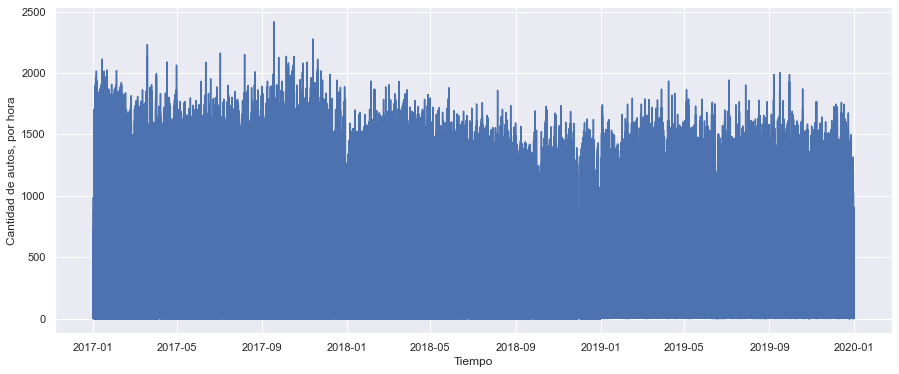

In [894]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

#### Resampleos<a name="id12"></a>

In [895]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

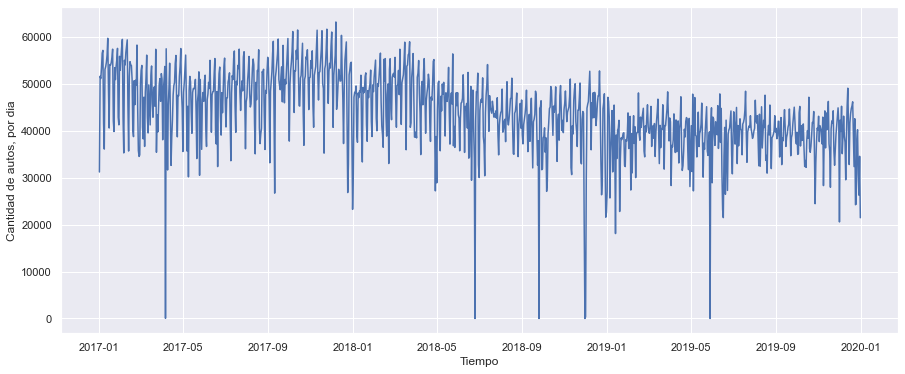

In [896]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## Semanal

In [897]:
#Resampleamos nuestros datos para agrupar por semana
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413
2017-01-22          357215
2017-01-29          354581

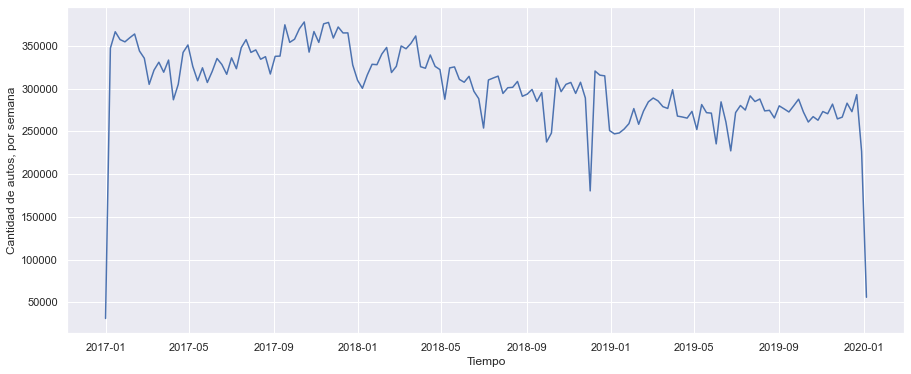

In [898]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

## Mensual

In [899]:
#Resampleamos nuestros datos para agrupar por mes
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(36, 1)


cantidad_pasos
fecha                     
2017-01-31         1565260
2017-02-28         1363113
2017-03-31         1451214
2017-04-30         1373985
2017-05-31         1407136

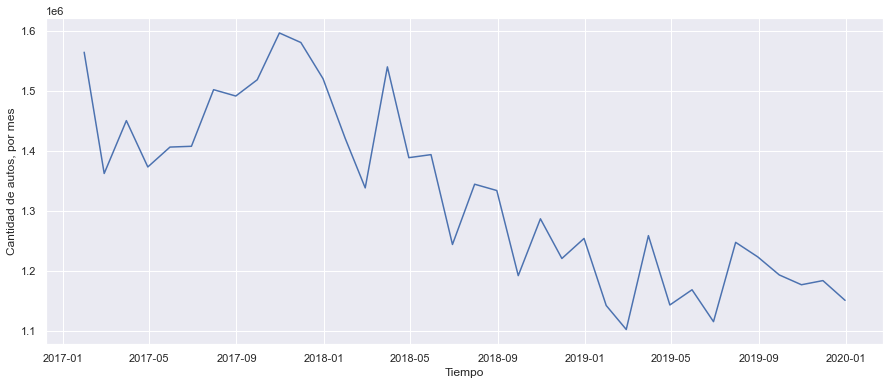

In [900]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

### Días con mayor tráfico<a name="id13"></a>

Vamos a buscar observar la distribución estadística de la cantidad de pasos por día, según el día de la semana

In [901]:
#armamos un nuevo dataset
dataset_2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_2.estacion=='Illia', dataset_2.forma_pago == 'EFECTIVO')
dataset_2 = dataset_2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_2.drop(columns = ['periodo','hora_inicio','hora_fin','forma_pago', 'estacion','sentido','tipo_vehiculo'], inplace = True)

dataset_2.head()

fecha     dia  cantidad_pasos
80   2019-01-01  Martes             537
86   2019-01-01  Martes               1
88   2019-01-01  Martes             443
94   2019-01-01  Martes               1
149  2019-01-01  Martes             769

In [902]:
dataset_2.shape

(238869, 3)

In [903]:
#Obtenemos un dataset que tenga un valor de cantidad de pasos por cada día (sumando los pasos de todas las horas de ese día)
#Por ende obtenemos 1091 observaciones (3 años)
cantidad_pasos_por_fecha = dataset_2.groupby(['fecha','dia']).sum()
cantidad_pasos_por_fecha.reset_index(inplace=True)
cantidad_pasos_por_fecha

fecha        dia  cantidad_pasos
0     2017-01-01    Domingo           31183
1     2017-01-02      Lunes           51568
2     2017-01-03     Martes           51093
3     2017-01-04  Miércoles           53332
4     2017-01-05     Jueves           56486
...          ...        ...             ...
1086  2019-12-27    Viernes           40182
1087  2019-12-28     Sábado           30681
1088  2019-12-29    Domingo           26259
1089  2019-12-30      Lunes           34523
1090  2019-12-31     Martes           21447

[1091 rows x 3 columns]

In [904]:
#Obtenemos el valor de la mediana de la cantidad de pasos por día (fecha), según el día de la semana que corresponda
mediana_por_dia = cantidad_pasos_por_fecha.groupby(['dia']).median()
mediana_por_dia.reset_index(inplace=True)
mediana_por_dia = mediana_por_dia.sort_values(by='cantidad_pasos')
mediana_por_dia

dia  cantidad_pasos
0    Domingo         37028.0
5     Sábado         41677.5
2      Lunes         42549.0
3     Martes         44311.5
4  Miércoles         46191.0
1     Jueves         46977.5
6    Viernes         49971.0

<AxesSubplot:xlabel='dia', ylabel='cantidad_pasos'>

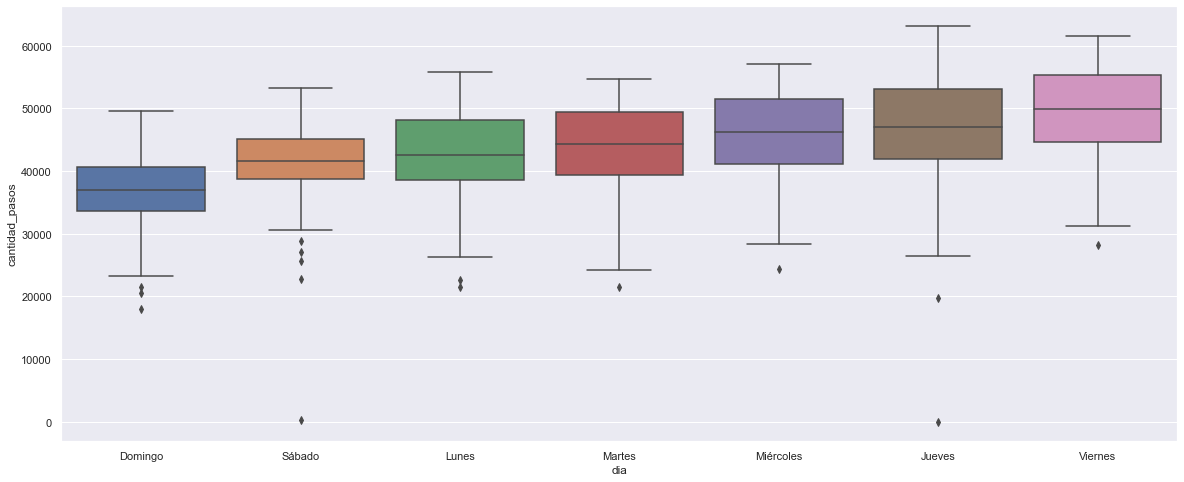

In [905]:
#Realizo el siguiente gráfico, con la finalidad de observar más amigablemente que día de la semana es el de mayor tráfico
#Lo anterior se observa a través de la distribución estadística de la cantidad de pasos, según el día de la semana
plt.figure(figsize = (20,8))
sns.boxplot(data=cantidad_pasos_por_fecha,y='cantidad_pasos',x='dia',order=mediana_por_dia.dia)

**Del gráfico anterior, se visualiza que el día con mayor tráfico es el día viernes con una mediana de 49.971 pasos por día.** 

**Y por otra parte, el día con menor movimiento es el día Domingo con una mediana de 37.028 pasos por día.**

### Horarios con mayor tráfico<a name="id14"></a>

Vamos a buscar observar la distribución estadística de la cantidad de pasos por hora según la hora del día

In [906]:
#armamos un nuevo dataset
dataset_3 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_3.estacion=='Illia', dataset_3.forma_pago == 'EFECTIVO')
dataset_3 = dataset_3[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_3.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','sentido','tipo_vehiculo'], inplace = True)

dataset_3.head()

fecha  hora_fin     dia  cantidad_pasos
80   2019-01-01         2  Martes             537
86   2019-01-01         2  Martes               1
88   2019-01-01         2  Martes             443
94   2019-01-01         2  Martes               1
149  2019-01-01         3  Martes             769

In [907]:
dataset_3.shape

(238869, 4)

In [908]:
#Obtenemos un dataset que tenga un valor de cantidad de pasos por cada hora 
cantidad_pasos_por_hora = dataset_3.groupby(['fecha','dia','hora_fin']).sum()
cantidad_pasos_por_hora.reset_index(inplace=True)
cantidad_pasos_por_hora

fecha      dia  hora_fin  cantidad_pasos
0      2017-01-01  Domingo         0            1576
1      2017-01-01  Domingo         1               1
2      2017-01-01  Domingo         2            1374
3      2017-01-01  Domingo         3            1734
4      2017-01-01  Domingo         4            1247
...           ...      ...       ...             ...
26097  2019-12-31   Martes        19            1217
26098  2019-12-31   Martes        20            1374
26099  2019-12-31   Martes        21            1706
26100  2019-12-31   Martes        22            1139
26101  2019-12-31   Martes        23             404

[26102 rows x 4 columns]

In [909]:
#Obtenemos el valor de la mediana de la cantidad de pasos por hora (fecha), según el horario que corresponda
mediana_por_hora = cantidad_pasos_por_hora.groupby(['hora_fin']).median()
mediana_por_hora.reset_index(inplace=True)
mediana_por_hora = mediana_por_hora.sort_values(by='cantidad_pasos',ascending=False)
mediana_por_hora

hora_fin  cantidad_pasos
18        18          2867.0
14        14          2816.0
19        19          2812.0
16        16          2793.0
15        15          2781.0
17        17          2768.0
13        13          2705.5
12        12          2557.0
20        20          2458.0
9          9          2419.5
11        11          2405.5
10        10          2377.0
8          8          2211.0
21        21          2142.0
22        22          1677.0
7          7          1494.0
23        23          1265.5
0          0           939.0
1          1           756.0
6          6           701.5
2          2           450.0
5          5           345.0
3          3           272.5
4          4           239.5

<AxesSubplot:xlabel='cantidad_pasos', ylabel='hora_fin'>

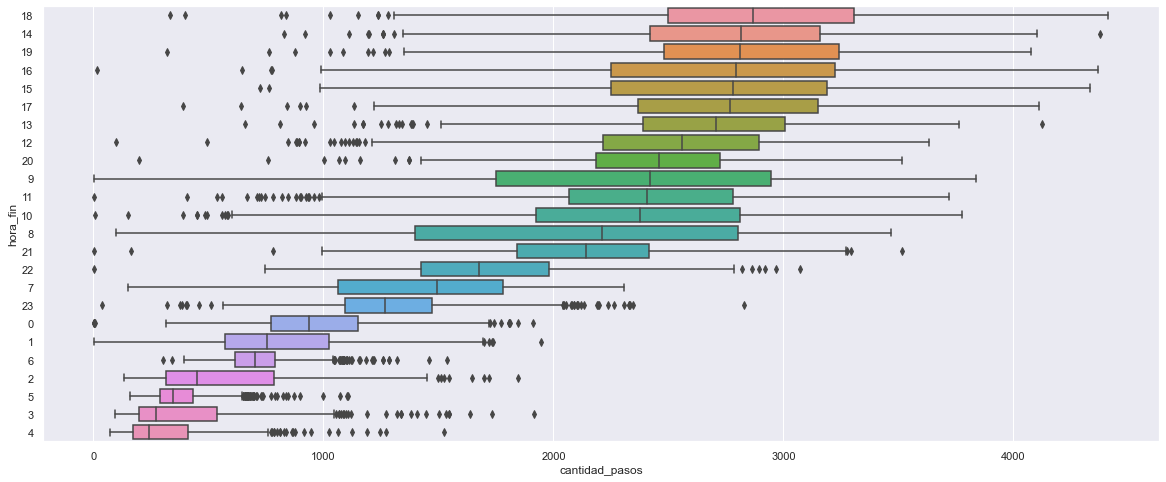

In [910]:
plt.figure(figsize = (20,8))
sns.boxplot(data=cantidad_pasos_por_hora,x='cantidad_pasos',y='hora_fin',orient='h',order=mediana_por_hora.hora_fin,width=0.8)#hue='dia')

### Observamos que el horario con mayor tráfico (hora pico) es a las 18:00 hs, con una mediana de 2867 pasos.

Que la franja horaria de mayor movimiento es entre las 14:00 hs y las 19:00 hs.

A su vez, visualizamos que las horas de menor movimiento se dan entre las 00:00 hs y las 06:00 hs.

### Días y Horarios con mayor tráfico<a name="id15"></a>

In [911]:
#pip install plotly

In [912]:
import plotly.express as px

In [913]:
import plotly.express as px
fig = px.box(cantidad_pasos_por_hora, x="cantidad_pasos", y="hora_fin",orientation='h',category_orders=mediana_por_hora.hora_fin,points=False,facet_row='dia',range_y=(13,20))
fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),autosize=False, width=700,
    height=800,
    paper_bgcolor="LightSteelBlue",title_text="Cantidad de Pasos en Franja Horaria pico y día de la semana"
)
fig.show()

#### En el gráfico anterior se trata de combinar la información de los pasos en la franja horaria de mayor movimiento, con la de los días de la semana, tratando de entender mejor el comportamiento de los momentos de mayor tráfico.


### Componentes de la serie<a name="id16"></a>
Calcula las componentes estacionales y tendencia de la serie. 

Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).

¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. Pista: primer semestre 2019.

Elijo trabajar con la serie resampleada a frecuencia semanal por los siguientes motivos:
    
    .En el caso de frencuencia diaria, el gráfico de la serie se encuentra muy saturado, ya que tenemos datos por día para una ventana de tiempo de 3 años. 
    
    .En el caso de la frecuencia mensual, la descarto porque me quedaría con muy pocos puntos de datos (36).

### Calcula las componentes estacionales y tendencia de la serie

#### OUTLIERS

In [914]:
semanal.head()

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413
2017-01-22          357215
2017-01-29          354581

<AxesSubplot:ylabel='cantidad_pasos'>

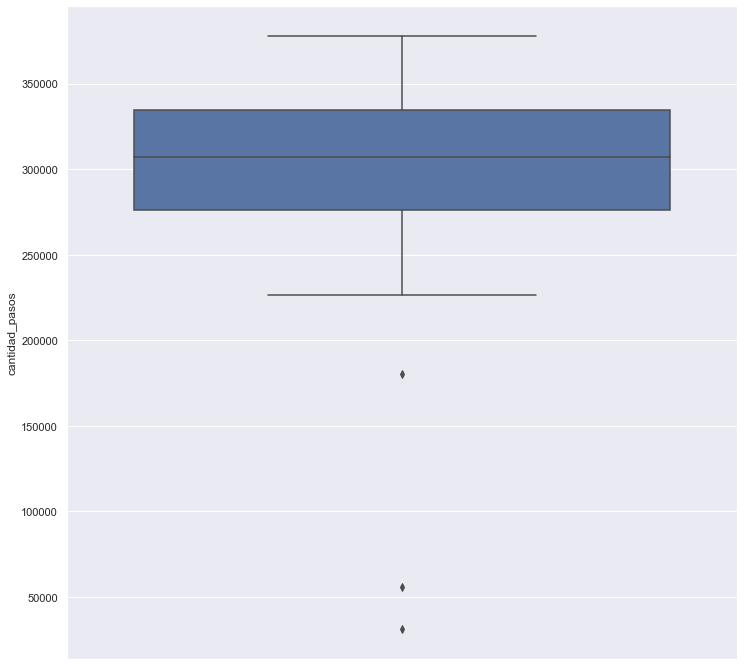

In [915]:
sns.boxplot(y=semanal.cantidad_pasos)

(0.0, 500000.0)

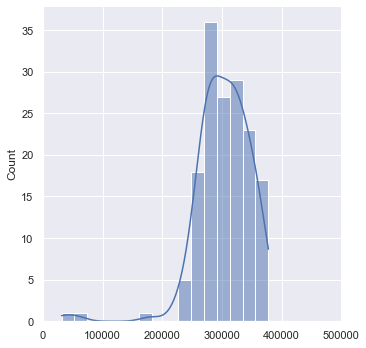

In [916]:
sns.displot(semanal.cantidad_pasos.values, kde=True )
plt.xlim(0,500000)

#### Rango Intercuartílico

In [917]:
q25, q75 = np.percentile(semanal.cantidad_pasos.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

276345.25 334921.5 58576.25 188480.875 422785.875


In [918]:
semanal.describe()

cantidad_pasos
count      158.000000
mean    302946.715190
std      47342.854449
min      31183.000000
25%     276345.250000
50%     307094.000000
75%     334921.500000
max     377832.000000

#### Detección de Outliers

In [919]:
semanal_OUT = semanal[(semanal.cantidad_pasos <= minimo) | (semanal.cantidad_pasos > maximo)]
print(semanal_OUT.shape)
print(semanal_OUT)

(3, 1)
            cantidad_pasos
fecha                     
2017-01-01           31183
2018-12-02          180328
2020-01-05           55970


#### Eliminación de Outliers

In [920]:
semanal.cantidad_pasos[semanal.cantidad_pasos < minimo] = np.nan
semanal.cantidad_pasos[semanal.cantidad_pasos > maximo] = np.nan
print(semanal.shape)
print(semanal)

(158, 1)
            cantidad_pasos
fecha                     
2017-01-01             NaN
2017-01-08        347212.0
2017-01-15        366413.0
2017-01-22        357215.0
2017-01-29        354581.0
...                    ...
2019-12-08        282891.0
2019-12-15        272960.0
2019-12-22        292881.0
2019-12-29        226390.0
2020-01-05             NaN

[158 rows x 1 columns]


<AxesSubplot:ylabel='cantidad_pasos'>

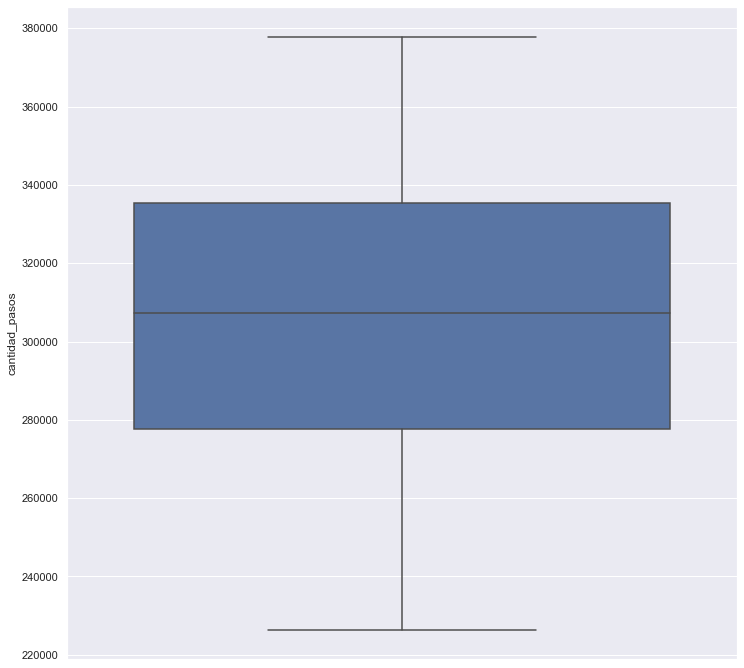

In [921]:
sns.boxplot(y=semanal.cantidad_pasos)

(0.0, 500000.0)

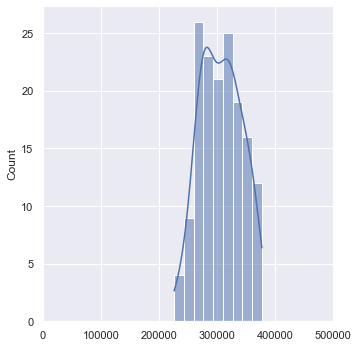

In [922]:
sns.displot(semanal.cantidad_pasos.values, kde=True )
plt.xlim(0,500000)

#### VALORES FALTANTES

In [923]:
print(semanal.isna().sum())

cantidad_pasos    3
dtype: int64


In [924]:
semanal = semanal.interpolate()
print(semanal.isna().sum())

cantidad_pasos    1
dtype: int64


In [925]:
semanal.isna()

cantidad_pasos
fecha                     
2017-01-01            True
2017-01-08           False
2017-01-15           False
2017-01-22           False
2017-01-29           False
...                    ...
2019-12-08           False
2019-12-15           False
2019-12-22           False
2019-12-29           False
2020-01-05           False

[158 rows x 1 columns]

### Rolling window

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como rolling window. En general, se utiliza junto con la media (media móvil), pero también se podría obtener el máximo, mínimo o cualquier otro estadístico.

In [926]:
ventana = int(360/7)
semanal_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_tendencia.head(26)

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
2017-02-05   NaN
2017-02-12   NaN
2017-02-19   NaN
2017-02-26   NaN
2017-03-05   NaN
2017-03-12   NaN
2017-03-19   NaN
2017-03-26   NaN
2017-04-02   NaN
2017-04-09   NaN
2017-04-16   NaN
2017-04-23   NaN
2017-04-30   NaN
2017-05-07   NaN
2017-05-14   NaN
2017-05-21   NaN
2017-05-28   NaN
2017-06-04   NaN
2017-06-11   NaN
2017-06-18   NaN
2017-06-25   NaN
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

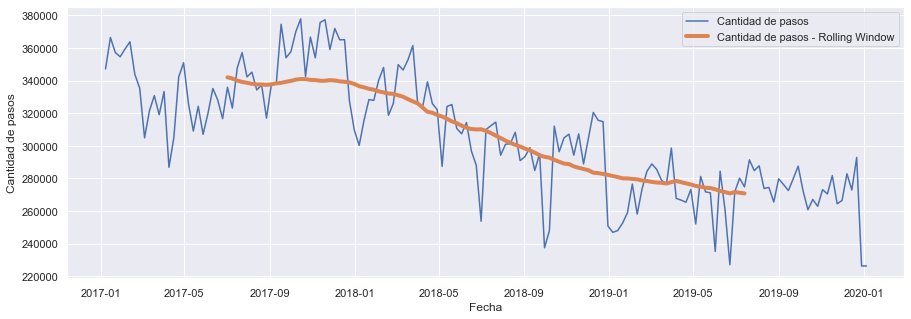

In [927]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(semanal_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

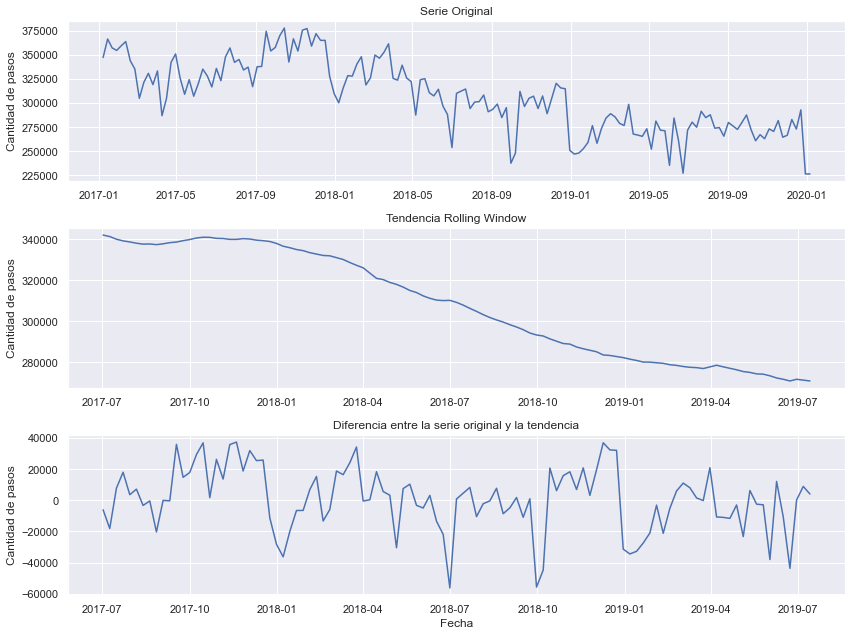

In [928]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.ylabel('Cantidad de pasos')
#plt.xlim('2017-06-01','2019-12-31')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal_tendencia)
plt.ylabel('Cantidad de pasos')
#plt.xlim('2017-06-01','2019-12-31')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.cantidad_pasos - semanal_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
#plt.xlim('2017-06-01','2019-12-31')

plt.tight_layout()
plt.show()

### Statsmodels

Existen varias librerías que ya incorporan técnicas para descomponer series. Una muy conocida es Statsmodels, que cuenta con muchas herramientas para análisis estadísticos.

In [929]:
semanal = semanal[semanal.cantidad_pasos.isnull() == False]

In [930]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal, model='additive')
#result.plot()

#### Grafiquemos

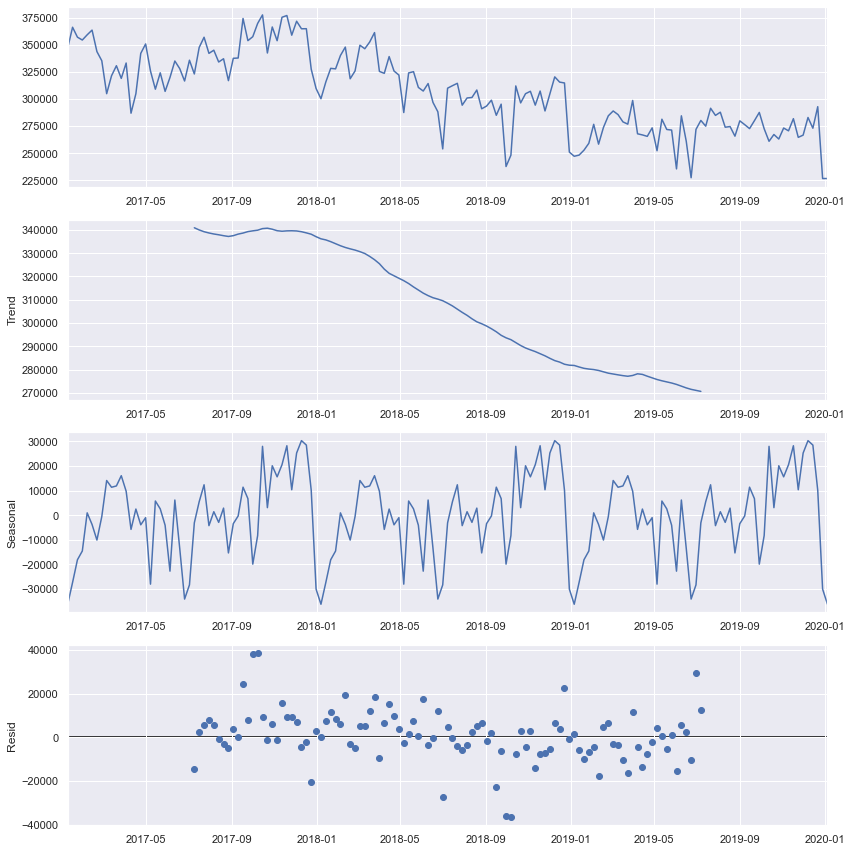

In [931]:
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

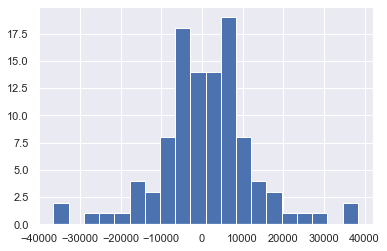

In [932]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

### Interpreta los resultados

Al obtener los componentes de la serie, tanto a través del proceso de Rolling Window como del uso de la librería Statsmodel, obtenemos la misma conclusión:

    ## Una tendencia decreciente de la serie
    ## Un comportamiento estacional (anual), marcado por los meses del año, que se repite
    ## Un ruido o residuo, que presenta un comportamiento similar a una distribución normal alrededor del 0

### Si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?

In [933]:
#armamos un nuevo dataset
dataset_formas_pago = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y todas las formas de pago
mask = (dataset_formas_pago.estacion=='Illia')
dataset_formas_pago = dataset_formas_pago[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_formas_pago.drop(columns = ['periodo','hora_inicio', 'estacion'], inplace = True)

dataset_formas_pago.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  forma_pago  \
19  2019-01-01         1  Martes     Centro       Liviano  NO COBRADO   
20  2019-01-01         1  Martes     Centro       Liviano    TELEPASE   
21  2019-01-01         1  Martes     Centro        Pesado    TELEPASE   
22  2019-01-01         1  Martes  Provincia       Liviano  NO COBRADO   
23  2019-01-01         1  Martes  Provincia       Liviano    TELEPASE   

    cantidad_pasos  
19             146  
20              59  
21               1  
22             147  
23             106

In [934]:
#Tipos de formas de pago
print(dataset_formas_pago['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD' 'TARJETA DISCAPACIDAD' 'MONEDERO']


* Sería intuitivo pensar que la forma de pago EFECTIVO, viene teniendo una tendencia decreciente, producto de una tendencia en el sentido contrario en TELEPASE

Para validar con datos la suposición mencionada arriba, debo realizar una descomposición de la serie correspondiente a la forma de pago "TELEPASE"

### * Cálculo de los componentes estacionales y tendencia de la serie "Forma de pago Telepase"

In [935]:
#armamos un nuevo dataset
dataset_telepase = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_telepase.estacion=='Illia', dataset_telepase.forma_pago == 'TELEPASE')
dataset_telepase = dataset_telepase[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_telepase.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
23  2019-01-01         1  Martes  Provincia       Liviano             106
25  2019-01-01         1  Martes  Provincia        Pesado               2
85  2019-01-01         2  Martes     Centro       Liviano             507

In [936]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')
    
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_telepase.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
85  Martes     Centro       Liviano             507 2019-01-01 02:00:00

In [937]:
#Corregimos el nombre de fecha2 a fecha
dataset_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_telepase.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
85  Martes     Centro       Liviano             507 2019-01-01 02:00:00

In [938]:
#Reordenamos el dataset por fecha
dataset_telepase.sort_values('fecha', inplace = True)
dataset_telepase.reset_index(drop=True, inplace = True)
dataset_telepase

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro        Pesado               9 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               3 2017-01-01 00:00:00
2       Domingo  Provincia        Pesado               7 2017-01-01 00:00:00
3       Domingo  Provincia       Liviano             275 2017-01-01 00:00:00
4       Domingo     Centro       Liviano             459 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
204607   Martes  Provincia       Liviano             600 2019-12-31 22:00:00
204608   Martes     Centro       Liviano             630 2019-12-31 22:00:00
204609   Martes  Provincia       Liviano             110 2019-12-31 23:00:00
204610   Martes     Centro       Liviano             122 2019-12-31 23:00:00
204611   Martes  Provincia        Pesado               1 2019-12-31 23:00:00

[204612 rows x 5 columns]

In [939]:
#Resampleamos nuestros datos para agrupar por semana
semanal_telepase = dataset_telepase.resample('W', on = 'fecha').sum()
print(semanal_telepase.shape)
semanal_telepase.head()

(158, 1)


cantidad_pasos
fecha                     
2017-01-01           12326
2017-01-08          225716
2017-01-15          233261
2017-01-22          229329
2017-01-29          230432

<AxesSubplot:ylabel='cantidad_pasos'>

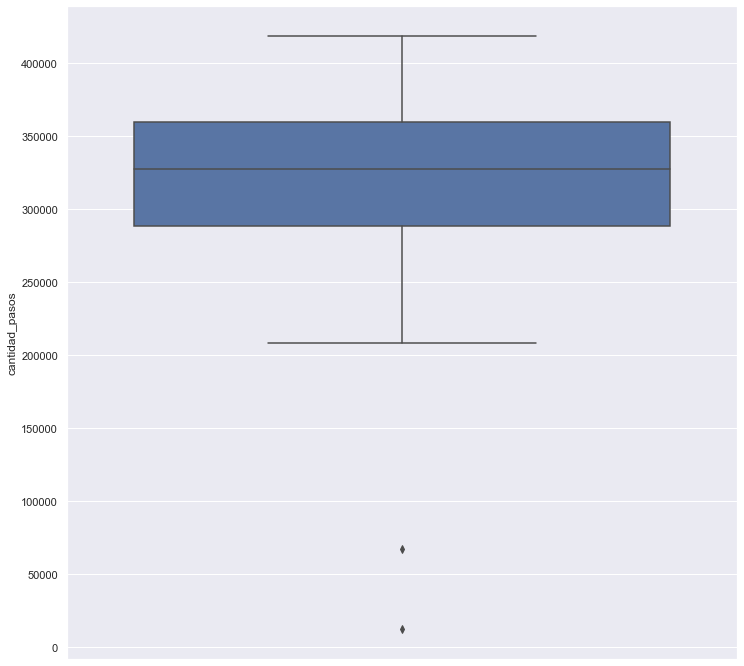

In [940]:
#Outliers
sns.boxplot(y=semanal_telepase.cantidad_pasos)

In [941]:
#Rango Intercuartílico
q25_telepase, q75_telepase = np.percentile(semanal_telepase.cantidad_pasos.values, [25,75])
iqr_telepase = q75 - q25
minimo_telepase = q25 - 1.5*iqr
maximo_telepase = q75 + 1.5*iqr
print(q25_telepase,q75_telepase,iqr_telepase, minimo_telepase, maximo_telepase)

288173.25 359997.75 58576.25 188480.875 422785.875


In [942]:
semanal_telepase.cantidad_pasos[semanal_telepase.cantidad_pasos < minimo_telepase] = np.nan
semanal_telepase.cantidad_pasos[semanal_telepase.cantidad_pasos > maximo_telepase] = np.nan
print(semanal_telepase.shape)
print(semanal_telepase)

(158, 1)
            cantidad_pasos
fecha                     
2017-01-01             NaN
2017-01-08        225716.0
2017-01-15        233261.0
2017-01-22        229329.0
2017-01-29        230432.0
...                    ...
2019-12-08        399201.0
2019-12-15        357831.0
2019-12-22        407208.0
2019-12-29        282395.0
2020-01-05             NaN

[158 rows x 1 columns]


<AxesSubplot:ylabel='cantidad_pasos'>

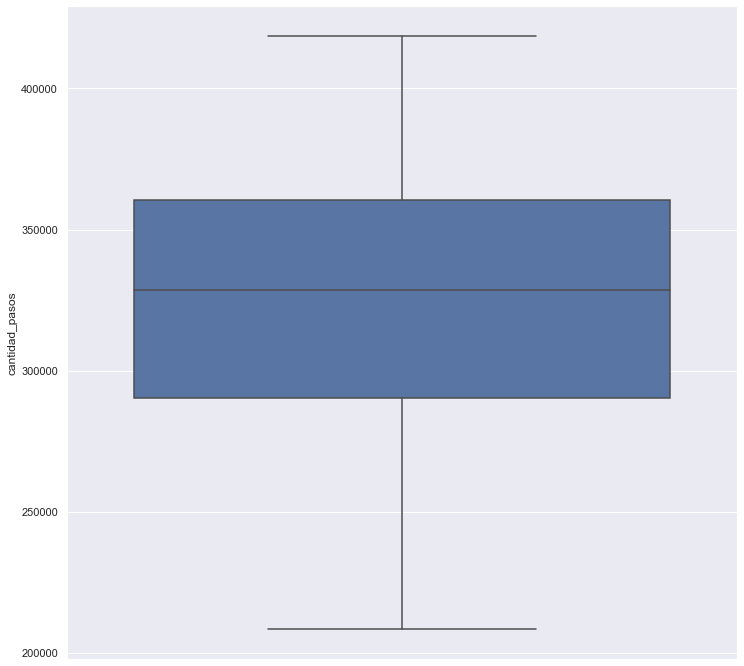

In [943]:
sns.boxplot(y=semanal_telepase.cantidad_pasos)

In [944]:
#Valores Faltantes
print(semanal_telepase.isna().sum())

cantidad_pasos    2
dtype: int64


In [945]:
semanal_telepase = semanal_telepase.interpolate()
print(semanal_telepase.isna().sum())

cantidad_pasos    1
dtype: int64


In [946]:
semanal_telepase = semanal_telepase[semanal_telepase.cantidad_pasos.isnull() == False]

In [947]:
#Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

result_semanal = seasonal_decompose(semanal_telepase, model='additive')
#result.plot()

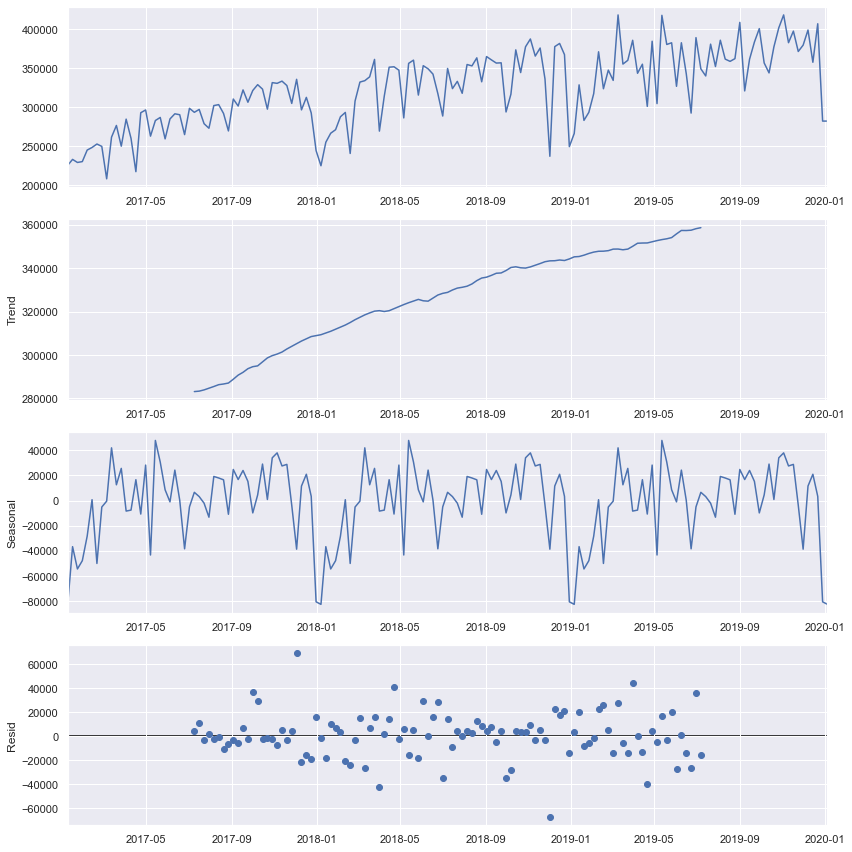

In [948]:
#plt.title("Componentes de la serie: FORMA DE PAGO TELEPASE")
plt.rcParams['figure.figsize'] = [12,12]
result_semanal.plot()
plt.show()

A través de descomponer la serie correspondiente a la misma estación de peaje (Illia), pero con forma de pago "TELEPASE", observamos una tendencia creciente en la serie de referencia, con una componente estacional también anual.

De esta forma, logramos dar respuesta a la pregunta planteada
 
    *si la tendencia es negativa en forma de pago EFECTIVO, ¿puede ser porque se migre a otras formas de pago?*
    
**Efectivamente, pudimos validar que se da una migración de la forma de pago EFECTIVO a la forma de pago TELEPASE, evidenciando un cambio en los hábitos de pago de los usuarios.**

* ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. Pista: primer semestre 2019.

In [949]:
#Voy a tomar la serie diaria, para buscar información de outliers por día
diario_atipicos = dataset.resample('D', on = 'fecha').sum()
print(diario_atipicos.shape)
diario_atipicos.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

<AxesSubplot:ylabel='cantidad_pasos'>

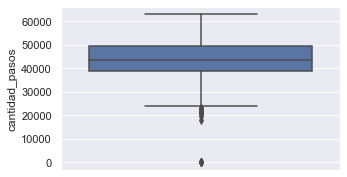

In [950]:
plt.figure(figsize=(5,3))
sns.boxplot(y=diario_atipicos.cantidad_pasos)

In [951]:
#Rango Intercuartíico
q25_DA, q75_DA = np.percentile(diario_atipicos.cantidad_pasos.values, [25,75])
iqr_DA = q75_DA - q25_DA
minimo_DA = q25_DA - 1.5*iqr_DA
maximo_DA = q75_DA + 1.5*iqr_DA
print(q25_DA,q75_DA,iqr_DA, minimo_DA, maximo_DA)

39061.5 49498.0 10436.5 23406.75 65152.75


In [952]:
diario_atipicos = diario_atipicos[(diario_atipicos.cantidad_pasos < minimo_DA) | (diario_atipicos.cantidad_pasos > maximo_DA)]
print(diario_atipicos.shape)
print(diario_atipicos)

(16, 1)
            cantidad_pasos
fecha                     
2017-04-06              40
2017-12-31           23229
2018-06-25               0
2018-09-25               0
2018-11-29           19728
2018-11-30               0
2018-12-01             350
2018-12-30           21559
2018-12-31           22599
2019-01-13           18076
2019-01-19           22774
2019-05-29               0
2019-06-16           23190
2019-06-17           21469
2019-12-01           20553
2019-12-31           21447


2017 : 
 * 06/04/2017 Foro Económico Mundial Davos realizo en la ciudad de buenos aires
 * 31/12/2017 Fin de año
 
2018 : 
 * 29/11/2018 al 01/12/2018 Cumbre del G-20 de Buenos Aires 
 * 30/12/2018 al 31/12/2018 Fin de año
 
2019 : 
 * 13/01/2019
 * 19/01/2019
 * 29/05/2019 Por el paro, los peajes son gratuitos. Los peajes de las autopistas de la Ciudad de Buenos Aires serán gratuitos durante el miércoles 29 de mayo
 * 16/06/2019 al 17/06/2019 https://www.diariolatercera.com.ar/nota/39856-16-06-2019-asi-fue-el-peor-apagon-en-la-historia-argentina/
 * 01/12/2019
 * 31/12/2019 Fin de año

 


## Predicción a Futuro<a name="id2"></a>
Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

**Indice**
1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

[Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?] (#id2)

1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

***Subíndice***   
  
1. [Haz todas las transformaciones de datos que consideres necesarias. Justifica.](#id21)
2. [Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.](#id22)
3. [Elige un modelo benchmark y compara tus resultados con este modelo.](#id23)
4. [Optimiza los hiperparámetros de tu modelo.](#id24)
5. [Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?](#id25)
6. [Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?](#id26)
7. [Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?](#id27)


##### 1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.<a name="id21"></a>

#### One-Step Prediction

Vamos a entrenar un RandomForestRegressor para predecir el siguiente valor en la serie de tiempo diaria de pasos de vehículos. Utilizaremos los 11 primeros trimestres como conjunto de entrenamiento. Y el trimestre 12 como evaluación.

#### Voy a trabajar con la serie con frecuencia diaria, para poder tener más datos de entrenamiento

In [953]:
diario.shape
diario

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2019-12-27           40182
2019-12-28           30681
2019-12-29           26259
2019-12-30           34523
2019-12-31           21447

[1095 rows x 1 columns]

* Grafico a continuación para observar la distribución y posible detección de Outliers

<AxesSubplot:ylabel='cantidad_pasos'>

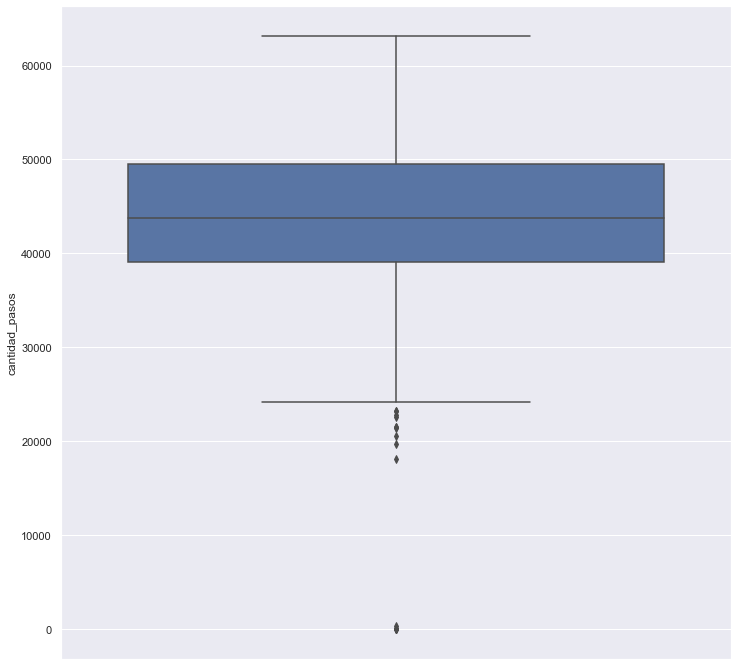

In [954]:
sns.boxplot(y=diario.cantidad_pasos)

##### Rango Intercuartílico

In [955]:
q25, q75 = np.percentile(diario.cantidad_pasos.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

39061.5 49498.0 10436.5 23406.75 65152.75


##### Deteccion de Outliers

In [956]:
diario_OUT = diario[(diario.cantidad_pasos < minimo) | (diario.cantidad_pasos > maximo)]
print(diario_OUT.shape)
print(diario_OUT)

(16, 1)
            cantidad_pasos
fecha                     
2017-04-06              40
2017-12-31           23229
2018-06-25               0
2018-09-25               0
2018-11-29           19728
2018-11-30               0
2018-12-01             350
2018-12-30           21559
2018-12-31           22599
2019-01-13           18076
2019-01-19           22774
2019-05-29               0
2019-06-16           23190
2019-06-17           21469
2019-12-01           20553
2019-12-31           21447


##### Eliminación de Outliers

In [957]:
diario.cantidad_pasos[diario.cantidad_pasos < minimo] = np.nan
diario.cantidad_pasos[diario.cantidad_pasos > maximo] = np.nan
print(diario.shape)
print(diario)

(1095, 1)
            cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31             NaN

[1095 rows x 1 columns]


##### VALORES FALTANTES

In [958]:
print(diario.isna().sum())

cantidad_pasos    16
dtype: int64


In [959]:
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    0
dtype: int64


* Grafico a continuación para observar como queda la distribución, luego de eliminar outliers y realizar el interpolate de los nulos

<AxesSubplot:ylabel='cantidad_pasos'>

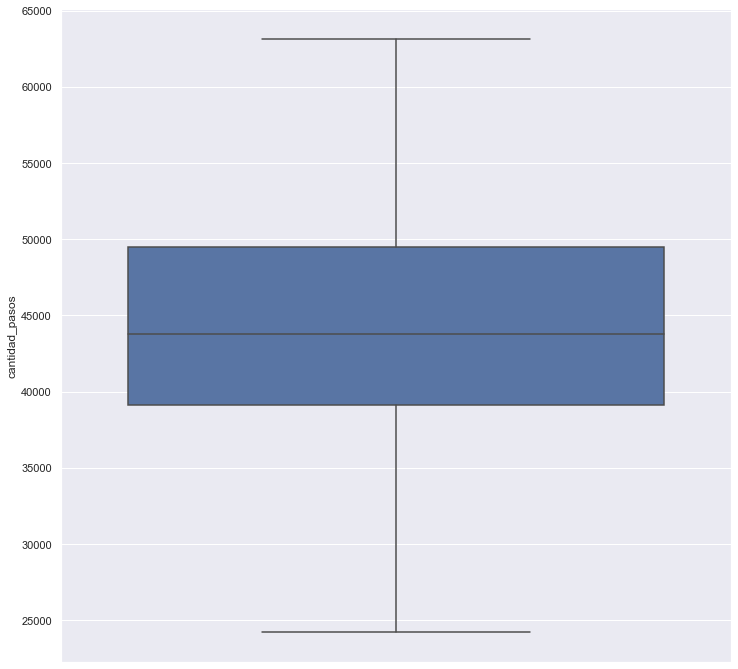

In [960]:
sns.boxplot(y=diario.cantidad_pasos)

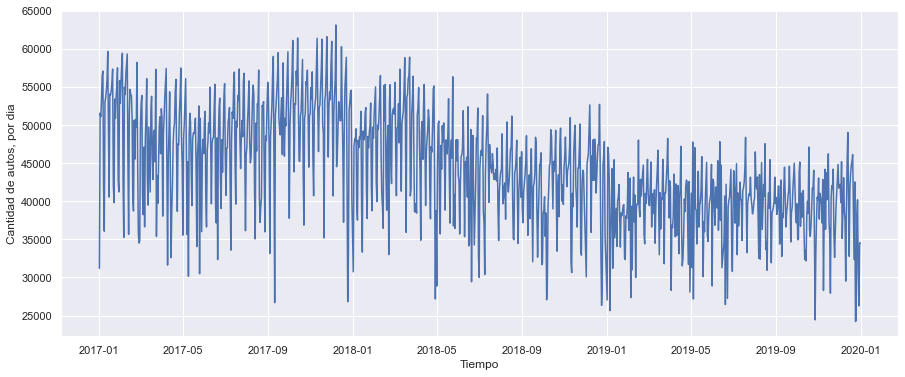

In [961]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### One-Step Prediction

In [962]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

* En primer lugar, debemos definir cuántos valores hacia atrás tomaremos.

In [963]:
look_back = 90 # usamos 90 días de datos para predecir el valor siguiente

Creamos los `X` e `y` con ceros para luego llenar con los datos.

In [964]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1004, 90) (1004,)


Llenamos los X e y

In [965]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [966]:
print(X)

[[31183. 51568. 51093. ... 51074. 46235. 52127.]
 [51568. 51093. 53332. ... 46235. 52127. 50995.]
 [51093. 53332. 56486. ... 52127. 50995. 38045.]
 ...
 [38348. 37170. 39669. ... 24349. 38168. 40182.]
 [37170. 39669. 34943. ... 38168. 40182. 30681.]
 [39669. 34943. 35054. ... 40182. 30681. 26259.]]


In [967]:
print(y)

[50995. 38045. 48833. ... 30681. 26259. 34523.]


* Hacemos el train/test split de los datos

In [968]:
N_train = 11*90 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(900, 90) (900,)
(90, 90) (90,)


* Entrenamos

In [969]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

##### 2. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.<a name="id22"></a>

Luego de realizar las transformaciones y adaptaciones correspondientes a la serie, obtenemos un dataset que sirve de entrada para un modelo que resuelva un problema de regresión. Es decir, nos quedamos con n features y la variable target objetivo es un valor.

Al tratarse de un problema de regresión, la métrica a utilizar estará asociada a medir el error en la predicción. En tal sentido considero apropiado utilizar la métrica : Raíz del Error Cuadrado Promedio (Root Mean Squared Error, RMSE) para que la misma esté expresada en las mismas unidades y magnitudes que la variable a predecir.

In [970]:
from sklearn.metrics import mean_squared_error

* Predecimos

In [971]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

* Graficamos

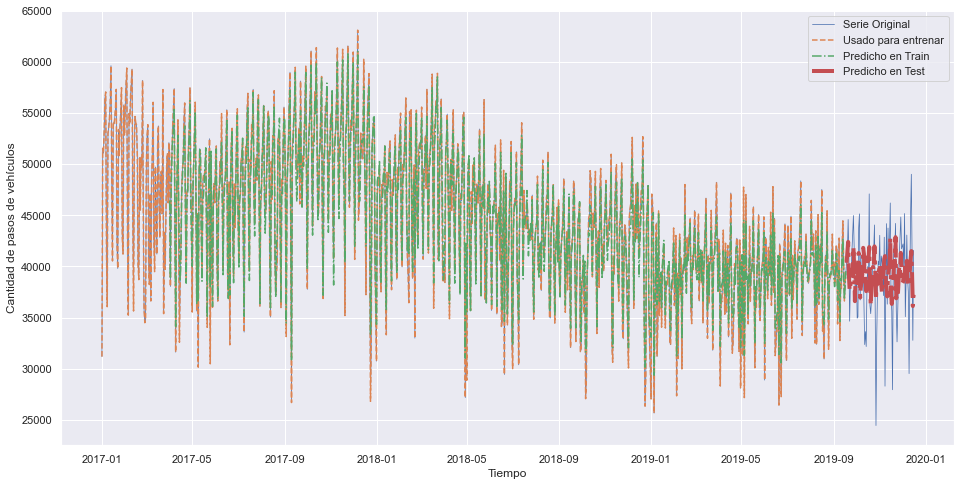

In [972]:
plt.figure(figsize=(16,8))

plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos de vehículos')
plt.show()

* A continuación, focalizo el gráfico desde el 01/08/2019 en adelante, para que sea más amigable la observación de la performance en test 

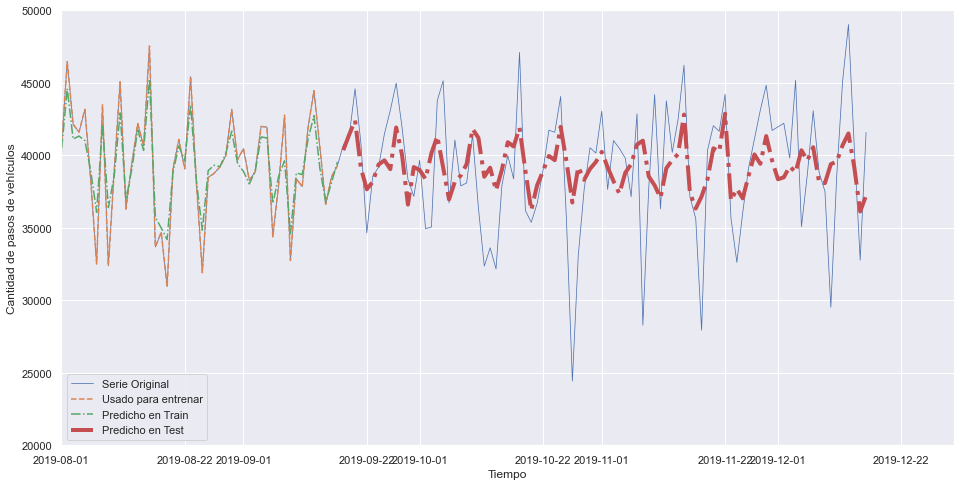

In [973]:
plt.figure(figsize=(16,8))

plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.xlim('2019-08-01','2019-12-31')
plt.ylim(20000,50000)
plt.ylabel('Cantidad de pasos de vehículos')
plt.show()

 * Calculamos el error RMSE en train y test

In [974]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1677.520766867425
Error en Test: 3769.612815220155


##### 3. Elige un modelo benchmark y compara tus resultados con este modelo.<a name="id23"></a>

* Benchmark: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior

In [975]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

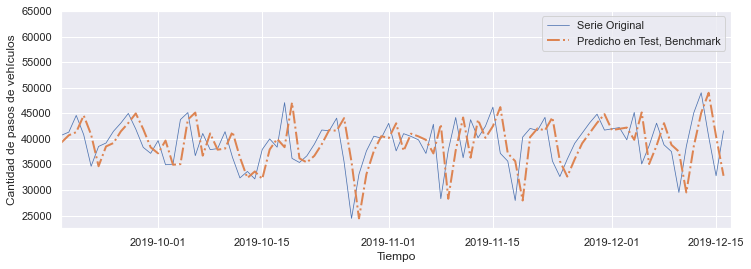

In [976]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos de vehículos')
plt.legend()
plt.show()

In [977]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

5323.960746265676


* Comparando los resultados del modelo entrenado con el modelo benchmark, obtenemos:

    Test score 3.769,61 (modelo) vs 5.323,96 (benchmark) (Mejora del 29,19%)

    Claramente hay una mejor performance del modelo entrenado (Random Forest Regressor) frente al modelo benchmark planteado (el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior)

##### 4. Optimiza los hiperparámetros de tu modelo.<a name="id24"></a>

* Optimización de hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Random Search

Hiperparámetros actualmente en uso:

In [978]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##### Intentaremos encontrar la mejor combinación sobre el siguiente conjunto de hiperparámetros:

**n_estimators** int, predeterminado = 100
El número de árboles en el bosque.

**max_features** {"auto", "sqrt", "log2"}, int o float, predeterminado = "auto"
La cantidad de características a considerar al buscar la mejor división:

**max_depth** int, predeterminado = Ninguno
La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

**min_samples_split** int o float, predeterminado = 2
El número mínimo de muestras necesarias para dividir un nodo interno:

**min_samples_leaf** int o float, predeterminado = 1
El número mínimo de muestras necesarias para estar en un nodo hoja. 

Para usar RandomizedSearchCV, primero necesitamos crear una cuadrícula de posibles valores a asumir los Hiperparámetros para que Random Search seleccione aleatoriamente de dicho rango en cada iteración

In [979]:
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [980]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1,2,4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [981]:
rf_rs = RandomForestRegressor()
rf_random_search = RandomizedSearchCV(estimator=rf_rs, param_distributions=random_grid, n_iter=30, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42 ).fit(X_train,y_train)

De acuerdo al Random Search realizado de 30 iteraciones aleatorias sobre los rangos definidos arriba, los hiperparámetros con mejor performance son los siguientes:¶

In [982]:
rf_random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [983]:
print("Mejor Score: "+str(rf_random_search.best_score_)+'\n')

Mejor Score: -4567.7152910133045



*A continuación observamos los resultados de las 30 iteraciones correspondientes a la búsqueda aleatoria con validación cruzada (5 folds) ordenados según el ranking (mejor mean_test_score)*

In [984]:
scores = pd.DataFrame(rf_random_search.cv_results_)
scores.sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
27      45.057274      0.859723         0.220342        0.029731   
3       20.700648      0.417255         0.117763        0.004833   
21      78.875967      2.395911         0.359393        0.040725   
15      97.684173      0.810225         0.434089        0.027099   
9       18.794567      0.471637         0.512385        0.033229   
16      16.550808      0.335669         0.435593        0.014687   
17      14.702137      0.361010         0.374954        0.015094   
5       25.233201      1.850831         0.100548        0.005866   
29       6.568169      0.133265         0.154271        0.027015   
28      16.598317      0.370913         0.438782        0.011485   
4        8.804116      1.424026         0.250368        0.033769   
24      23.723875      0.496416         0.093082        0.001600   
1        2.856995      0.217349         0.077121        0.008050   
11      48.880943      0.653242         0.184678        0.033038   
19       9.072389      0.207961         0.241410        0.020100   
25      13.544967      0.205994         0.053220        0.003406   
2        3.015131      0.088111         0.097985        0.004778   
23      13.272099      0.372541         0.431994        0.016706   
20      11.694712      0.389871         0.395794        0.034432   
22       4.480210      0.029458         0.168669        0.028998   
12      10.552993      0.896587         0.352362        0.046772   
26      16.956411      0.416268         0.527913        0.033924   
0        6.710397      0.264413         0.228437        0.006218   
13      14.065769      0.683319         0.473496        0.058145   
8        4.628625      0.220333         0.150449        0.005267   
14       8.768480      0.356338         0.204965        0.014881   
18       3.795821      0.193670         0.112675        0.019731   
10       7.022604      0.277552         0.210439        0.012187   
7        4.923384      0.573759         0.170574        0.043944   
6        1.427100      0.046236         0.043589        0.002801   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
27                800                       2                      4   
3                 600                       2                      4   
21               1400                       2                      4   
15               1600                      10                      2   
9                2000                       5                      4   
16               1800                       5                      4   
17               1600                       2                      4   
5                 400                      10                      1   
29                600                       2                      2   
28               1800                      10                      4   
4                1400                       2                      2   
24                400                      10                      2   
1                 600                      10                      2   
11                600                       2                      1   
19               1000                      10                      2   
25                200                       5                      1   
2                 800                       2                      4   
23               1800                       5                      4   
20               1600                      10                      4   
22                600                       2                      4   
12               1400                       2                      4   
26               2000                       2                      2   
0                1800                      10                      2   
13               1800                       5                      4   
8                 600                       2                      4   
14                800  

Definimos el modelo con los hiperparámetros optimizados encontrados gracias a la búsqueda aleatoria:

In [985]:
rf_1 = RandomForestRegressor(n_estimators=600, min_samples_split = 2, min_samples_leaf=4, max_features = 'auto',max_depth= 20, n_jobs=4, oob_score = True, random_state = 42).fit(X_train,y_train)

* Predecimos

* Calculamos el error RMSE en train y test

In [986]:
y_pred_1 = rf_1.predict(X)
y_train_pred_1 = rf_1.predict(X_train)
y_test_pred_1 = rf_1.predict(X_test)

In [987]:
MSE_1 = mean_squared_error(y_train, y_train_pred_1)
print('Error en Train:',np.sqrt(MSE_1))

MSE_1 = mean_squared_error(y_test, y_test_pred_1)
print('Error en Test:',np.sqrt(MSE_1))

Error en Train: 2296.8909529923903
Error en Test: 3729.985590469745


* Podemos observar una muy leve mejoría en el desempeño del modelo con los hiperparámetros encontrados en la búsqueda aleatoria respecto al modelo con los valores de hiperparámetros por defecto

    Test score 3.729,99 (Hiperparámetros Optimizados) vs 3.769,61 (Hiperparámetros por defecto) (Mejora del 1,05%)

    El tiempo insumido y la complejidad agregada al modelo con los hiperparámetros optimizados, luego de la búsqueda aleatoria, no es compensada con una notoria mejoría en la performance.

##### 5. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?<a name="id25"></a>

* Graficamos la importancia de cada feature.

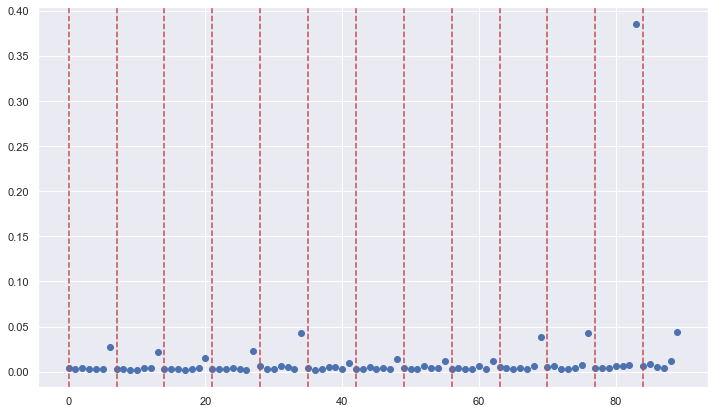

In [988]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange((90/7))*(7):
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Del gráfico correspondiente a la importancia de las features, se puede observar la mayor importancia de:

* El valor correspondiente a 7 días antes (que se corresponde al mismo día de la semana anterior)
* El día anterior a la predicción
* Los valores correspondientes a los mismos días de la semana en las semanas anteriores (múltiplos de 7)

##### 6. Predicción año 2020<a name="id26"></a>

#### Multi-Step Prediction

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [989]:
x = X_test[89,:]
x.reshape(1,-1)
x

array([39293. , 40707. , 41326. , 44596. , 40820. , 34646. , 38523. ,
       39191. , 41486. , 43110. , 44985. , 41925. , 38348. , 37170. ,
       39669. , 34943. , 35054. , 43775. , 45150. , 36722. , 41064. ,
       37894. , 38100. , 41414. , 36383. , 32359. , 33626. , 32168. ,
       37928. , 39997. , 38379. , 47105. , 36187. , 35383. , 36687. ,
       38960. , 41737. , 41593. , 44064. , 35475. , 24434. , 33081. ,
       37630. , 40527. , 40159. , 43053. , 37655. , 41024. , 40486. ,
       39814. , 37153. , 42866. , 28286. , 37738. , 44193. , 36314. ,
       43761. , 40201. , 42486. , 46216. , 37172. , 35640. , 27937. ,
       40345. , 42049. , 41656. , 44215. , 35675. , 32623. , 36038. ,
       39138. , 41133. , 43130. , 44841. , 41722. , 41968.5, 42215. ,
       39820. , 45181. , 35084. , 38676. , 43076. , 38839. , 37518. ,
       29518. , 38546. , 45099. , 49027. , 40478. , 32774. ])

In [990]:
X_test[91:].shape

(0, 90)

In [991]:
y_ms_test_pred = []
x = X_test[89,:] # arrancamos con la última instancia que tenemos conocimiento real del dato
for i in range(366):
    y_os_pred = rf_1.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [992]:
x

array([39653.76414039, 39597.5306654 , 39366.2238056 , 39372.26881637,
       39534.18474357, 39611.82345938, 39698.15542013, 39846.71974996,
       39625.72394471, 39503.98015793, 39391.54407094, 39359.20025761,
       39556.3443041 , 39742.99532826, 39926.254523  , 39702.9532944 ,
       39505.25458809, 39341.33696618, 39373.71973224, 39524.91610614,
       39791.96005641, 39831.21255128, 39628.85264464, 39371.17115542,
       39312.92180737, 39522.79998265, 39586.1815967 , 39771.57917291,
       39758.90600056, 39518.70960725, 39386.54871622, 39426.90995303,
       39567.94170024, 39638.17629694, 39754.51040883, 39695.76044948,
       39622.48327592, 39587.89330686, 39385.81238136, 39427.2884517 ,
       39600.06370203, 39748.27332224, 39767.25494725, 39671.96257015,
       39516.76986761, 39385.77654019, 39424.71318024, 39535.02073365,
       39808.21188845, 39822.82949607, 39564.93531578, 39429.56297779,
       39322.62288851, 39463.68582045, 39688.08912629, 39783.77211639,
      

In [993]:
y_ms_test_pred.shape

(366, 1)

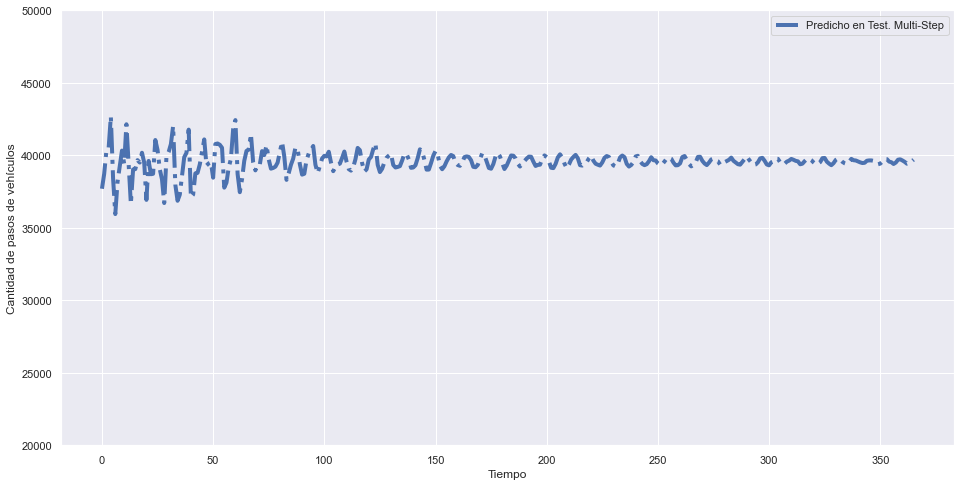

In [994]:
plt.figure(figsize=(16,8))

#plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
#plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

#plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
#plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.plot(y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
#plt.xlim('2019-08-01','2020-12-31')
plt.ylim(20000,50000)
plt.ylabel('Cantidad de pasos de vehículos')
plt.show()

#### Voy a traer los datos reales del 2020 para comparar la predicción realizada a través de multistep

In [995]:
data_2020 = pd.read_csv('Datasets/flujo-vehicular-2020.csv', sep =',')

In [996]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [997]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [998]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


Estamos trabajando con la estación Illia y la forma de pago Efectivo

In [999]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]

#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','mes','dia_fecha','observacion'], inplace = True)

data_2020.head()

fecha        dia  hora_fin tipo_vehiculo    sentido  \
52   2020-01-01 00:00:00  Miércoles       1.0          Auto     Centro   
53   2020-01-01 00:00:00  Miércoles       1.0          Auto  Provincia   
134  2020-01-01 00:00:00  Miércoles       2.0          Auto     Centro   
135  2020-01-01 00:00:00  Miércoles       2.0          Auto  Provincia   
202  2020-01-01 00:00:00  Miércoles       3.0          Auto     Centro   

     cantidad_pasos  
52            326.0  
53            319.0  
134           199.0  
135           180.0  
202           114.0

In [1000]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020.head()

dia tipo_vehiculo    sentido  cantidad_pasos              fecha2
52   Miércoles          Auto     Centro           326.0 2020-01-01 01:00:00
53   Miércoles          Auto  Provincia           319.0 2020-01-01 01:00:00
134  Miércoles          Auto     Centro           199.0 2020-01-01 02:00:00
135  Miércoles          Auto  Provincia           180.0 2020-01-01 02:00:00
202  Miércoles          Auto     Centro           114.0 2020-01-01 03:00:00

In [1001]:
#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

dia tipo_vehiculo    sentido  cantidad_pasos               fecha
52   Miércoles          Auto     Centro           326.0 2020-01-01 01:00:00
53   Miércoles          Auto  Provincia           319.0 2020-01-01 01:00:00
134  Miércoles          Auto     Centro           199.0 2020-01-01 02:00:00
135  Miércoles          Auto  Provincia           180.0 2020-01-01 02:00:00
202  Miércoles          Auto     Centro           114.0 2020-01-01 03:00:00

In [1002]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020

dia   tipo_vehiculo    sentido  cantidad_pasos  \
0      Miércoles            Moto     Centro             7.0   
1      Miércoles            Auto  Provincia           423.0   
2      Miércoles            Auto     Centro           467.0   
3      Miércoles            Moto  Provincia             6.0   
4      Miércoles  Pesados 2 Ejes     Centro             1.0   
...          ...             ...        ...             ...   
52369     Jueves            Auto  Provincia           222.0   
52370     Jueves            Auto  Provincia           106.0   
52371     Jueves            Moto     Centro             5.0   
52372     Jueves            Moto  Provincia             1.0   
52373     Jueves            Auto     Centro           103.0   

                    fecha  
0     2020-01-01 00:00:00  
1     2020-01-01 00:00:00  
2     2020-01-01 00:00:00  
3     2020-01-01 00:00:00  
4     2020-01-01 00:00:00  
...                   ...  
52369 2020-12-31 20:00:00  
52370 2020-12-31 21:00:00  
52371 2020-12-31 21:00:00  
52372 2020-12-31 21:00:00  
52373 2020-12-31 21:00:00  

[52374 rows x 5 columns]

In [1003]:
#Resampleamos nuestros datos para agrupar por dia
diario_2020 = data_2020.resample('D', on = 'fecha').sum()
print(diario_2020.shape)
diario_2020.head()

(366, 1)


cantidad_pasos
fecha                     
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0

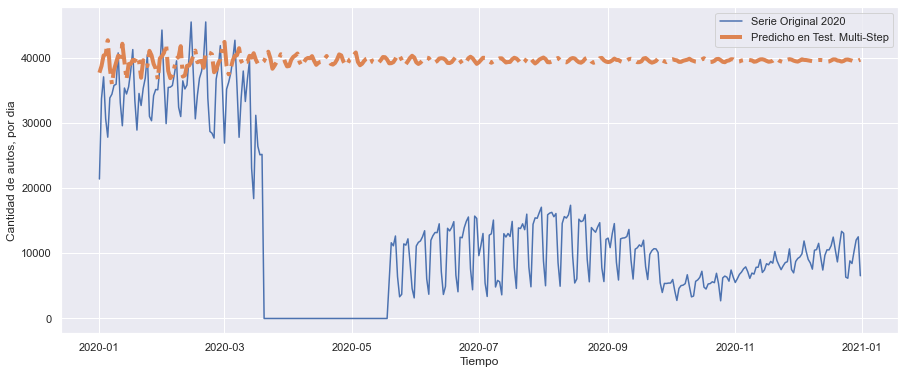

In [1004]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,label = 'Serie Original 2020')
plt.plot(diario_2020.index,y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.legend()
plt.show()

In [1005]:
MSE = mean_squared_error(diario_2020.cantidad_pasos, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 28979.055428562126


Como era de esperar a medida que nos alejamos en el tiempo, las predicciones son más erróneas, producto de la acumulación de los mismos. Ya que con un modelo entrenado One Step Prediction, estamos realizando una predicción Multistep, incorporando como dato de entrada las predicciones. 

Sin embargo:
*Observación: en la curva real notamos un cambio abrupto en su comportamiento a partir del mes de marzo 2020 (claramente relacionado con el incio de las medidas de “aislamiento social, preventivo y obligatorio” con el fin de prevenir la circulación y el contagio del virus COVID-19, dispuesto a partir de las 00:00 horas del día 20 de marzo de 2020.*

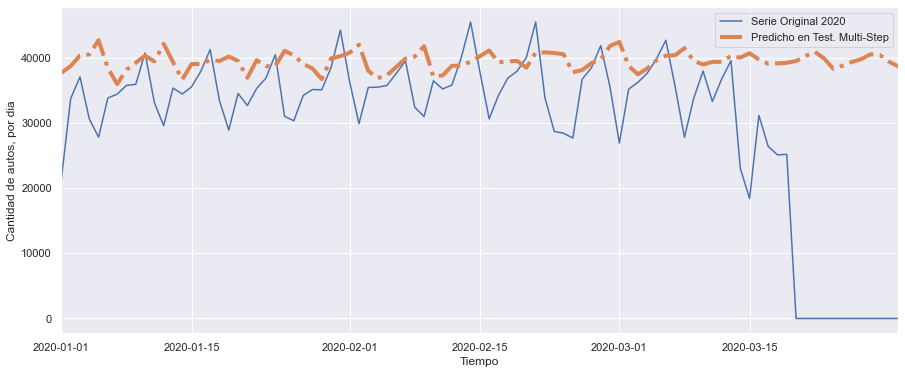

In [1006]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,label = 'Serie Original 2020')
plt.plot(diario_2020.index,y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.xlim('2020-01-01','2020-03-31')
plt.legend()
plt.show()

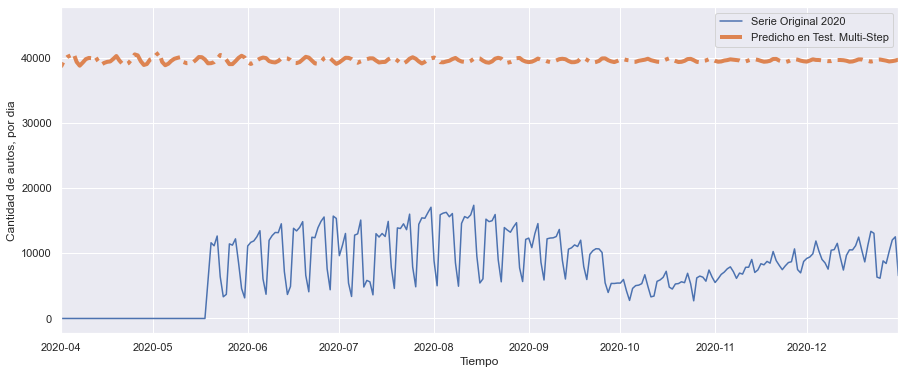

In [1007]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,label = 'Serie Original 2020')
plt.plot(diario_2020.index,y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.xlim('2020-04-01','2020-12-31')
plt.legend()
plt.show()

*En este contexto, vamos a evaluar los resultados de la predicción (multistep) hasta el día 20/03/2020, ya que luego de esta fecha hay un cambio sustancial y constante en el comportamiento de la serie debido a factores externos nuevos que el modelo no puede aprenderlos con los datos históricos.*

In [1008]:
#Filtramos la curva del 2020 hasta el día 19/03/2020 inclusive
diario_2020_20032020 = diario_2020[diario_2020.index<'2020-03-20']
print(diario_2020_20032020)
diario_2020_20032020.shape

            cantidad_pasos
fecha                     
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0
...                    ...
2020-03-15         18390.0
2020-03-16         31168.0
2020-03-17         26407.0
2020-03-18         25106.0
2020-03-19         25174.0

[79 rows x 1 columns]


(79, 1)

In [1009]:
diario_2020.iloc[78,:]

cantidad_pasos    25174.0
Name: 2020-03-19 00:00:00, dtype: float64

In [1010]:
#Filtramos las predicciones hasta el día 19/03/2020 inclusive
y_ms_test_pred_20032020 = y_ms_test_pred[:79]
y_ms_test_pred_20032020

array([[37699.17940655],
       [38723.74570097],
       [40334.90091884],
       [40504.05066824],
       [42681.62812736],
       [38416.69139631],
       [35950.55736083],
       [38159.18468576],
       [39229.04254234],
       [40329.62665188],
       [39420.5434019 ],
       [42146.53655817],
       [39352.02624355],
       [36651.80542813],
       [39029.0476413 ],
       [39050.96409078],
       [39670.39455238],
       [39505.32230113],
       [40183.34945851],
       [39503.07834422],
       [36929.06646629],
       [39617.18712735],
       [38700.67202951],
       [38728.89527927],
       [41059.92522079],
       [40375.80701729],
       [39048.81940673],
       [38342.41402368],
       [36712.27445209],
       [39909.29911306],
       [40237.54707339],
       [40774.41084632],
       [42015.47687508],
       [37976.50053949],
       [36867.05323564],
       [37289.90462404],
       [38591.31495307],
       [39876.25235737],
       [40173.7997872 ],
       [41775.67610073],


*Calculamos el error promedio en la predicción, hasta el 19/03/2020 inclsuive*

In [1011]:
MSE = mean_squared_error(diario_2020_20032020.cantidad_pasos, y_ms_test_pred_20032020)
print('Error en Test (hasta 20/03/2020):',np.sqrt(MSE))

Error en Test (hasta 20/03/2020): 7479.723707337737


**** Como se observaba graficamente, el error promedio es mucho menor hasta el día 20/03 donde comienza la cuarentena estricta en el país.***

##### 7. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?<a name="id27"></a>

In [1012]:
data_2016 = pd.read_csv('Datasets/flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('Datasets/flujo-vehicular-2015.csv', sep =',')
data_2014 = pd.read_csv('Datasets/flujo-vehicular-2014.csv', sep =',')
data_2013 = pd.read_csv('Datasets/flujo-vehicular-2013.csv', sep =',')
data_2012 = pd.read_csv('Datasets/flujo-vehicular-2012.csv', sep =',')

In [1013]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

In [1014]:
data_2015.info()
data_2015.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB


periodo       fecha  hora     dia   estacion tipo_vehiculo  \
1017953     2015  2015-12-31    21  Jueves  Sarmiento       Liviano   
1017954     2015  2015-12-31    21  Jueves  Sarmiento       Liviano   
1017955     2015  2015-12-31    22  Jueves  Sarmiento       Liviano   
1017956     2015  2015-12-31    22  Jueves  Sarmiento       Liviano   
1017957     2015  2015-12-31    23  Jueves  Sarmiento       Liviano   

         forma_pago  cantidad_pasos  
1017953      AUPASS               1  
1017954      AUPASS             121  
1017955  NO COBRADO               5  
1017956      AUPASS              19  
1017957      AUPASS               4

In [1015]:
data_2014.info()
data_2014.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809376 entries, 0 to 809375
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   periodo         809374 non-null  float64
 1   fecha           809374 non-null  object 
 2   hora            809374 non-null  float64
 3   dia             809374 non-null  object 
 4   estacion        809374 non-null  object 
 5   tipo_vehiculo   809374 non-null  object 
 6   forma_pago      809374 non-null  object 
 7   cantidad_pasos  809375 non-null  float64
dtypes: float64(3), object(5)
memory usage: 49.4+ MB


periodo       fecha  hora        dia   estacion tipo_vehiculo  \
809371   2014.0  2014-12-31  21.0  Miercoles  Sarmiento       Liviano   
809372   2014.0  2014-12-31  22.0  Miercoles  Sarmiento       Liviano   
809373   2014.0  2014-12-31  22.0  Miercoles  Sarmiento       Liviano   
809374   2014.0  2014-12-31  23.0  Miercoles  Sarmiento       Liviano   
809375   2014.0  2014-12-31  23.0  Miercoles  Sarmiento       Liviano   

        forma_pago  cantidad_pasos  
809371      AUPASS            82.0  
809372  NO COBRADO             5.0  
809373      AUPASS             5.0  
809374  NO COBRADO             2.0  
809375      AUPASS             3.0

In [1016]:
data_2013.info()
data_2013.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706401 entries, 0 to 706400
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         706401 non-null  int64 
 1   fecha           706401 non-null  object
 2   hora            706401 non-null  int64 
 3   dia             706401 non-null  object
 4   estacion        706401 non-null  object
 5   tipo_vehiculo   706401 non-null  object
 6   forma_pago      706401 non-null  object
 7   cantidad_pasos  706401 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 43.1+ MB


periodo       fecha  hora     dia estacion tipo_vehiculo  forma_pago  \
0     2013  2013-01-01     0  Martes  Alberdi       Liviano  NO COBRADO   
1     2013  2013-01-01     0  Martes  Alberdi       Liviano    EFECTIVO   
2     2013  2013-01-01     0  Martes  Alberdi       Liviano    EFECTIVO   
3     2013  2013-01-01     0  Martes  Alberdi       Liviano      AUPASS   
4     2013  2013-01-01     1  Martes  Alberdi       Liviano  NO COBRADO   

   cantidad_pasos  
0              20  
1               1  
2              51  
3              16  
4               1

In [1017]:
data_2012.info()
data_2012.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707757 entries, 0 to 707756
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         707757 non-null  int64 
 1   fecha           707757 non-null  object
 2   hora            707757 non-null  int64 
 3   dia             707757 non-null  object
 4   estacion        707757 non-null  object
 5   tipo_vehiculo   707757 non-null  object
 6   forma_pago      707757 non-null  object
 7   cantidad_pasos  707757 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 43.2+ MB


periodo       fecha  hora      dia estacion tipo_vehiculo  forma_pago  \
0     2012  2012-01-01     0  Domingo  Alberdi       Liviano  NO COBRADO   
1     2012  2012-01-01     0  Domingo  Alberdi       Liviano    EFECTIVO   
2     2012  2012-01-01     0  Domingo  Alberdi       Liviano      EXENTO   
3     2012  2012-01-01     0  Domingo  Alberdi       Liviano    EFECTIVO   
4     2012  2012-01-01     0  Domingo  Alberdi       Liviano      AUPASS   

   cantidad_pasos  
0              56  
1               2  
2               2  
3              26  
4              10

In [1018]:
print(data_2016['estacion'].unique())
print(data_2015['estacion'].unique())
print(data_2014['estacion'].unique())
print(data_2013['estacion'].unique())
print(data_2012['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 nan]
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia']


In [1019]:
print(data_2016['forma_pago'].unique())
print(data_2015['forma_pago'].unique())
print(data_2014['forma_pago'].unique())
print(data_2013['forma_pago'].unique())
print(data_2012['forma_pago'].unique())

['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'AUPASS' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO' nan]
['NO COBRADO' 'EFECTIVO' 'AUPASS' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'MONEDERO' 'INFRACCION']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'MONEDERO' 'INFRACCION']


Podemos decir entonces que los años 2012, 2013, 2014, 2015 y 2016 tienen las siguientes columnas con la siguiente información:

periodo: año del dset

fecha: año mes dia

* hora_inicio hora de inicio de la cuenta de vehiculos (sólo 2016 cuenta con esta columna)

* hora_fin hora de fin de la cuenta de vehiculos (sólo 2016 cuenta con esta columna)

hora: hora de la cuenta de vehículos (2012 a 2015 incluido cuentan con esta columna)

dia: dia de la semana

estacion: estaciones de peaje, difieren levemente entre los años

sentido: Centro o Provincia (sólo 2016 cuenta con esta columna)

tipo_vehiculo: Liviano o Pesado

forma_pago: Hay varias y varian entre los años.

cantidad_pasos: Cantidad de vehiculos

In [1020]:
#Voy a eliminar las columna del año 2016 que no están en el resto de los años. Dejo la columna "hora_fin" como indicativa de la hora.
data_2016.drop(columns=['hora_inicio','sentido'], inplace = True)

In [1021]:
#Voy a renombrar el nombre de la columan "hora_fin" del dataset del 2016 por el nombre que coincida con el resto de los datasets.
data_2016.rename(columns={'hora_fin':'hora'}, inplace = True)

In [1022]:
#Unimos los datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_historico = pd.concat([data_2012, data_2013, data_2014, data_2015, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_historico.estacion=='Illia', dataset_historico.forma_pago == 'EFECTIVO')
dataset_historico = dataset_historico[mask]

dataset_historico.head()

periodo       fecha  hora      dia estacion tipo_vehiculo forma_pago  \
991    2012.0  2012-01-01   0.0  Domingo    Illia       Liviano   EFECTIVO   
993    2012.0  2012-01-01   0.0  Domingo    Illia       Liviano   EFECTIVO   
997    2012.0  2012-01-01   0.0  Domingo    Illia        Pesado   EFECTIVO   
1000   2012.0  2012-01-01   1.0  Domingo    Illia       Liviano   EFECTIVO   
1004   2012.0  2012-01-01   1.0  Domingo    Illia       Liviano   EFECTIVO   

      cantidad_pasos  
991              8.0  
993            144.0  
997              2.0  
1000            22.0  
1004          1095.0

In [1023]:
#Quitamos las columnas que no vamos a utilizar
dataset_historico.drop(columns = ['periodo','forma_pago', 'estacion'], inplace = True)

dataset_historico.head()

fecha  hora      dia tipo_vehiculo  cantidad_pasos
991   2012-01-01   0.0  Domingo       Liviano             8.0
993   2012-01-01   0.0  Domingo       Liviano           144.0
997   2012-01-01   0.0  Domingo        Pesado             2.0
1000  2012-01-01   1.0  Domingo       Liviano            22.0
1004  2012-01-01   1.0  Domingo       Liviano          1095.0

In [1024]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_historico['fecha2'] = pd.to_datetime(dataset_historico.fecha) + pd.to_timedelta(dataset_historico.hora, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_historico.drop(columns=['fecha','hora'], inplace = True)

dataset_historico.head()

dia tipo_vehiculo  cantidad_pasos              fecha2
991   Domingo       Liviano             8.0 2012-01-01 00:00:00
993   Domingo       Liviano           144.0 2012-01-01 00:00:00
997   Domingo        Pesado             2.0 2012-01-01 00:00:00
1000  Domingo       Liviano            22.0 2012-01-01 01:00:00
1004  Domingo       Liviano          1095.0 2012-01-01 01:00:00

In [1025]:
#Corregimos el nombre de fecha2 a fecha
dataset_historico.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_historico.head()

dia tipo_vehiculo  cantidad_pasos               fecha
991   Domingo       Liviano             8.0 2012-01-01 00:00:00
993   Domingo       Liviano           144.0 2012-01-01 00:00:00
997   Domingo        Pesado             2.0 2012-01-01 00:00:00
1000  Domingo       Liviano            22.0 2012-01-01 01:00:00
1004  Domingo       Liviano          1095.0 2012-01-01 01:00:00

In [1026]:
#Reordenamos el dataset por fecha
dataset_historico.sort_values('fecha', inplace = True)
dataset_historico.reset_index(drop=True, inplace = True)
dataset_historico

dia tipo_vehiculo  cantidad_pasos               fecha
0       Domingo       Liviano             8.0 2012-01-01 00:00:00
1       Domingo       Liviano           144.0 2012-01-01 00:00:00
2       Domingo        Pesado             2.0 2012-01-01 00:00:00
3       Domingo       Liviano            22.0 2012-01-01 01:00:00
4       Domingo       Liviano          1095.0 2012-01-01 01:00:00
...         ...           ...             ...                 ...
350459   Sábado       Liviano            10.0 2016-12-31 23:00:00
350460   Sábado       Liviano           207.0 2016-12-31 23:00:00
350461   Sábado       Liviano             5.0 2016-12-31 23:00:00
350462   Sábado       Liviano           224.0 2016-12-31 23:00:00
350463   Sábado        Pesado             5.0 2016-12-31 23:00:00

[350464 rows x 4 columns]

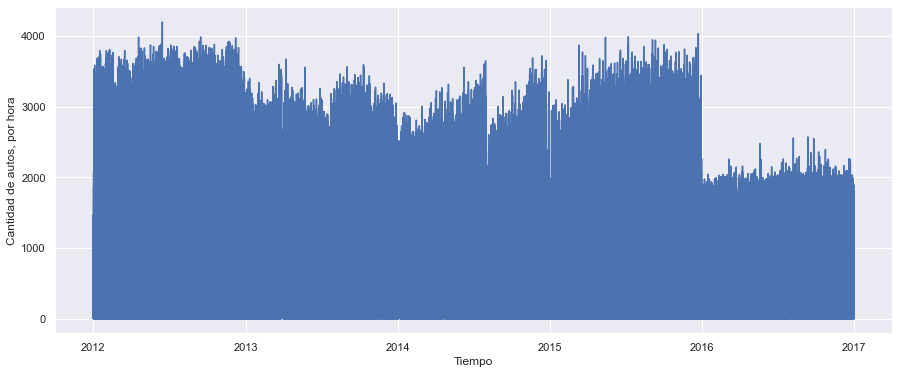

In [1027]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_historico.fecha, dataset_historico.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [1028]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_historico = dataset_historico.resample('D', on = 'fecha').sum()
print(diario_historico.shape)
diario_historico.head()

(1827, 1)


cantidad_pasos
fecha                     
2012-01-01         28733.0
2012-01-02         41189.0
2012-01-03         51851.0
2012-01-04         51966.0
2012-01-05         53300.0

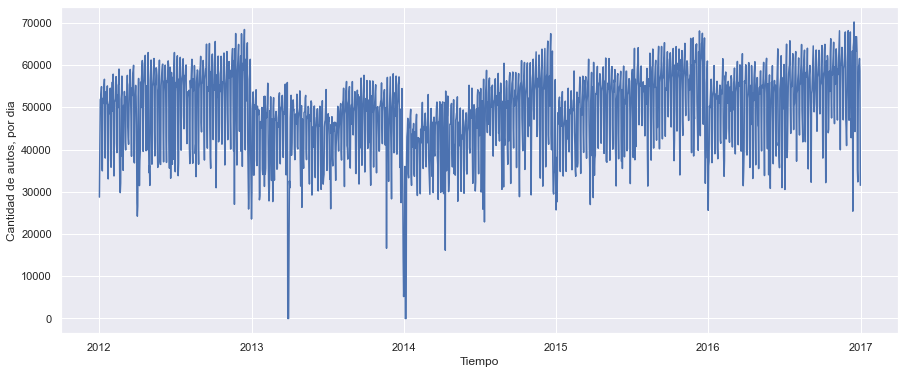

In [1029]:
plt.figure(figsize = (15,6))
plt.plot(diario_historico.index, diario_historico.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

<AxesSubplot:ylabel='cantidad_pasos'>

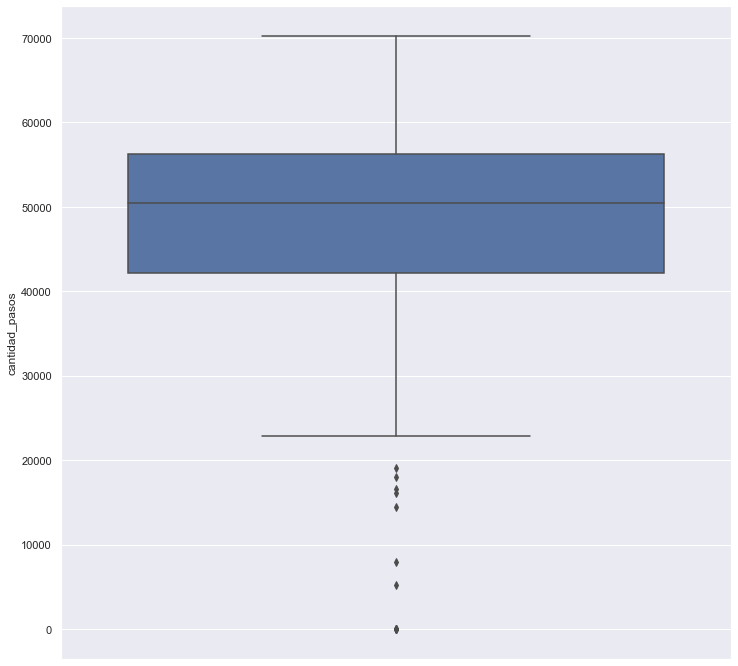

In [1030]:
sns.boxplot(y=diario_historico.cantidad_pasos)

#### Outliers Dataset Diario Histórico

In [1031]:
#Rango Intercuartílico
q25_historico, q75_historico = np.percentile(diario_historico.cantidad_pasos.values, [25,75])
iqr_historico = q75_historico - q25_historico
minimo_historico = q25_historico - 1.5*iqr_historico
maximo_historico = q75_historico + 1.5*iqr_historico
print(q25_historico,q75_historico,iqr_historico, minimo_historico, maximo_historico)

42203.0 56240.5 14037.5 21146.75 77296.75


In [1032]:
#Detección de Outliers
diario_OUT_historico = diario_historico[(diario_historico.cantidad_pasos < minimo_historico) | (diario_historico.cantidad_pasos > maximo_historico)]
print(diario_OUT_historico.shape)
print(diario_OUT_historico)

(13, 1)
            cantidad_pasos
fecha                     
2013-03-28             0.0
2013-03-29             0.0
2013-03-30             0.0
2013-03-31         19052.0
2013-11-20         16620.0
2013-12-30         14485.0
2013-12-31          5191.0
2014-01-01          7979.0
2014-01-02         18024.0
2014-01-04             1.0
2014-01-05             1.0
2014-01-06             1.0
2014-04-10         16160.0


In [1033]:
#Eliminación de Outliers
diario_historico.cantidad_pasos[diario_historico.cantidad_pasos < minimo_historico] = np.nan
diario_historico.cantidad_pasos[diario_historico.cantidad_pasos > maximo_historico] = np.nan
print(diario_historico.shape)
print(diario_historico)

(1827, 1)
            cantidad_pasos
fecha                     
2012-01-01         28733.0
2012-01-02         41189.0
2012-01-03         51851.0
2012-01-04         51966.0
2012-01-05         53300.0
...                    ...
2016-12-27         59662.0
2016-12-28         60291.0
2016-12-29         61551.0
2016-12-30         58601.0
2016-12-31         31527.0

[1827 rows x 1 columns]


<AxesSubplot:ylabel='cantidad_pasos'>

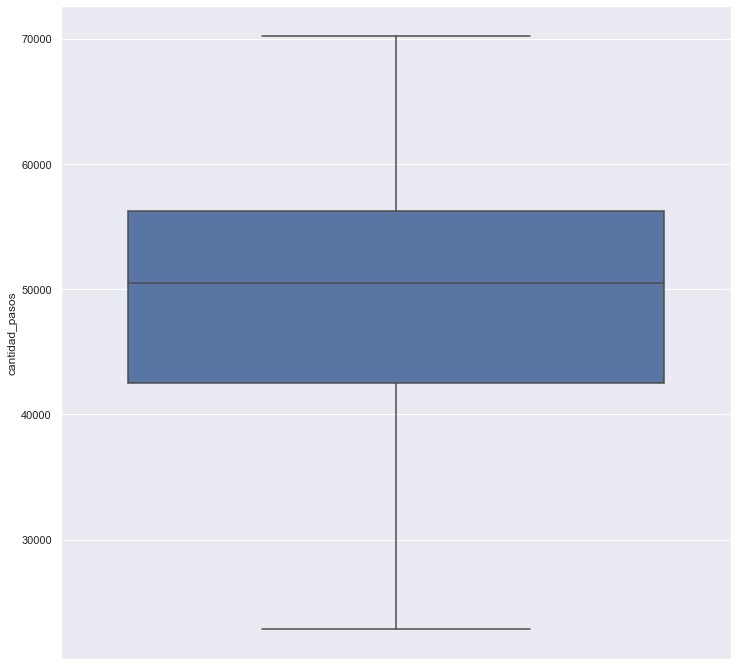

In [1034]:
sns.boxplot(y=diario_historico.cantidad_pasos)

#### Valores Faltantes

In [1035]:
print(diario_historico.isna().sum())

cantidad_pasos    13
dtype: int64


In [1036]:
diario_historico = diario_historico.interpolate()
print(diario_historico.isna().sum())

cantidad_pasos    0
dtype: int64


* Grafico a continuación para observar como queda la distribución, luego de eliminar outliers y realizar el interpolate de los nulos

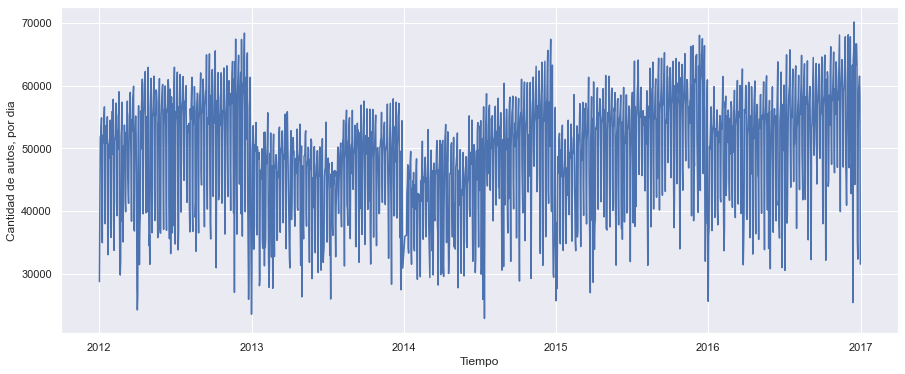

In [1037]:
plt.figure(figsize = (15,6))
plt.plot(diario_historico.index, diario_historico.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Realizo la unión de los datasets con frecuencia diaria, pra obtener uno único con información desde 2012 a 2019 inclusive

In [1038]:
print(diario.shape)
print(diario_historico.shape)

(1095, 1)
(1827, 1)


In [1039]:
diario_completo = pd.concat([diario_historico, diario])

diario_completo

cantidad_pasos
fecha                     
2012-01-01         28733.0
2012-01-02         41189.0
2012-01-03         51851.0
2012-01-04         51966.0
2012-01-05         53300.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         34523.0

[2922 rows x 1 columns]

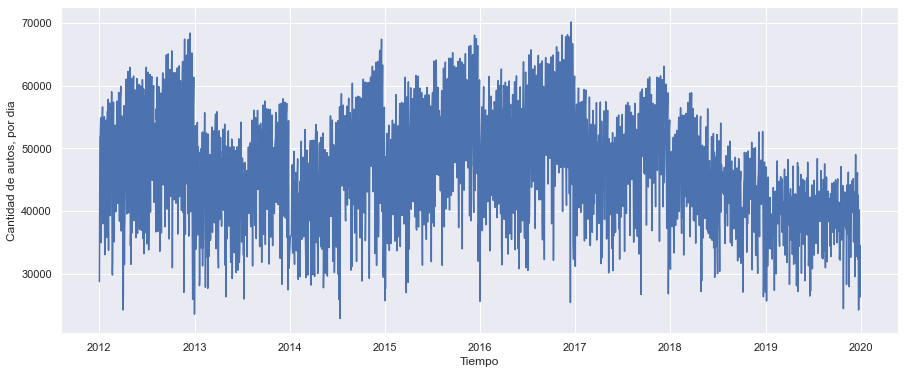

In [1040]:
plt.figure(figsize = (15,6))
plt.plot(diario_completo.index, diario_completo.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

#### One-Step Prediction

Vamos a entrenar un RandomForestRegressor para predecir el siguiente valor en la serie de tiempo diaria de pasos de vehículos. Utilizaremos los 31 primeros trimestres (primer semestre año 2012 hasta tercer trimestre 2019 como conjunto de entrenamiento. Y el trimestre 32 (último trimestre del 2019) como evaluación.

In [1041]:
senial = diario_completo.cantidad_pasos
senial.head()

fecha
2012-01-01    28733.0
2012-01-02    41189.0
2012-01-03    51851.0
2012-01-04    51966.0
2012-01-05    53300.0
Freq: D, Name: cantidad_pasos, dtype: float64

* En primer lugar, debemos definir cuántos valores hacia atrás tomaremos.

In [1042]:
look_back = 90 # usamos 90 días de datos para predecir el valor siguiente
#Creamos los X e y con ceros para luego llenar con los datos.
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(2831, 90) (2831,)


In [1043]:
#Llenamos los X e y
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [1044]:
print(X)

[[28733. 41189. 51851. ... 55191. 52556. 45577.]
 [41189. 51851. 51966. ... 52556. 45577. 27316.]
 [51851. 51966. 53300. ... 45577. 27316. 24221.]
 ...
 [38348. 37170. 39669. ... 24349. 38168. 40182.]
 [37170. 39669. 34943. ... 38168. 40182. 30681.]
 [39669. 34943. 35054. ... 40182. 30681. 26259.]]


In [1045]:
print(y)

[27316. 24221. 26588. ... 30681. 26259. 34523.]


* Hacemos el train/test split de los datos

In [1046]:
N_train = 31*90 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(2700, 90) (2700,)
(90, 90) (90,)


* Entrenamos

In [1047]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [1048]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

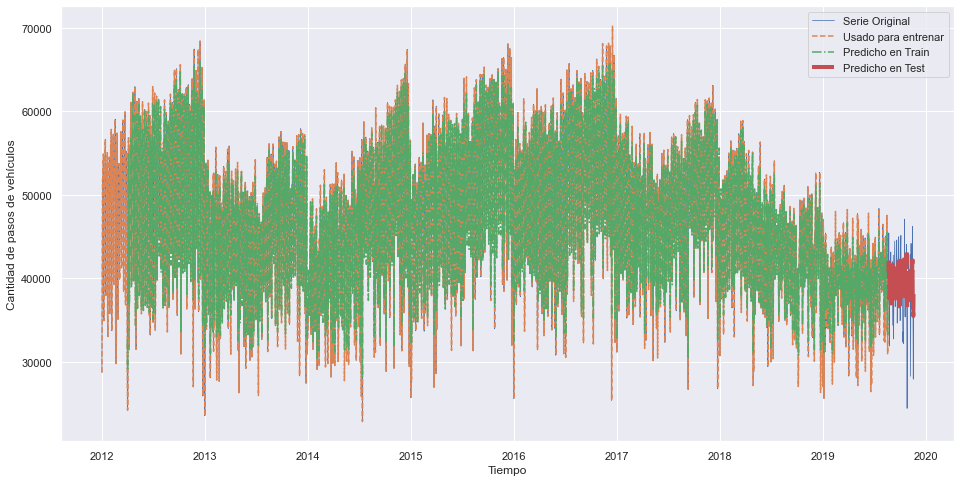

In [1049]:
plt.figure(figsize=(16,8))

plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos de vehículos')
plt.show()

* A continuación, focalizo el gráfico desde el 01/08/2019 en adelante, para que sea más amigable la observación de la performance en test

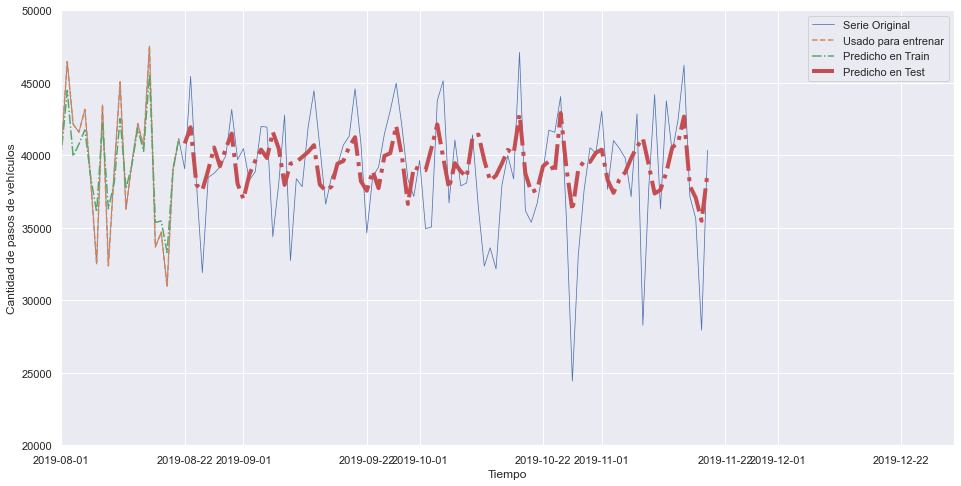

In [1050]:
plt.figure(figsize=(16,8))

plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.xlim('2019-08-01','2019-12-31')
plt.ylim(20000,50000)
plt.ylabel('Cantidad de pasos de vehículos')
plt.show()

* Calculamos el error RMSE en train y test

In [1051]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1966.0351331445956
Error en Test: 3521.9772974772936


Los resultados del One Step prediction luego de incorporar más periodos hacia atrás en la serie, arrojan:

* Test score 3.521,98 (Histórico desde 2012) vs 3.769,61 (Histórico desde 2017) (Mejora del 6,57%)

    **Observamos una pequeña mejora en la performance, al incorporar más datos de entrenamiento.**

##### Predicción año 2020

#### Multi-Step Prediction

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [1052]:
x = X_test[89,:]
x.reshape(1,-1)
x

array([41105., 39066., 45447., 38050., 31905., 38482., 38760., 39207.,
       39986., 43164., 39703., 40473., 38274., 38869., 41994., 41954.,
       34380., 38023., 42777., 32750., 38391., 37842., 41912., 44463.,
       40606., 36628., 38539., 39293., 40707., 41326., 44596., 40820.,
       34646., 38523., 39191., 41486., 43110., 44985., 41925., 38348.,
       37170., 39669., 34943., 35054., 43775., 45150., 36722., 41064.,
       37894., 38100., 41414., 36383., 32359., 33626., 32168., 37928.,
       39997., 38379., 47105., 36187., 35383., 36687., 38960., 41737.,
       41593., 44064., 35475., 24434., 33081., 37630., 40527., 40159.,
       43053., 37655., 41024., 40486., 39814., 37153., 42866., 28286.,
       37738., 44193., 36314., 43761., 40201., 42486., 46216., 37172.,
       35640., 27937.])

In [1053]:
X_test[91:].shape

(0, 90)

In [1054]:
y_ms_test_pred = []
x = X_test[89,:] # arrancamos con la última instancia que tenemos conocimiento real del dato
for i in range(366):
    y_os_pred = rf_1.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [1055]:
y_ms_test_pred.shape

(366, 1)

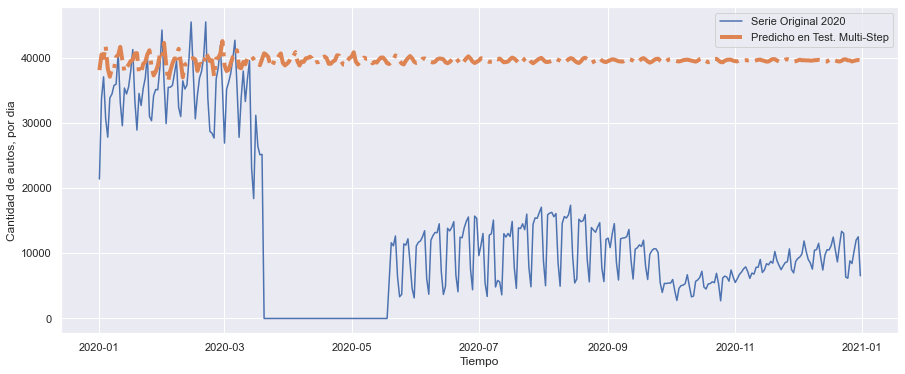

In [1056]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,label = 'Serie Original 2020')
plt.plot(diario_2020.index,y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.legend()
plt.show()

In [1057]:
#Filtramos las predicciones hasta el día 19/03/2020 inclusive
y_ms_test_pred_20032020 = y_ms_test_pred[:79]
y_ms_test_pred_20032020

array([[38100.23288813],
       [40502.49991947],
       [39974.42289562],
       [41750.68908078],
       [38344.47235986],
       [37084.20166291],
       [38369.48536376],
       [38251.50085203],
       [40122.96219323],
       [40440.61814375],
       [41673.10814463],
       [39597.07188978],
       [37919.02368017],
       [38500.51479004],
       [38932.0493491 ],
       [39505.26925175],
       [39672.06841405],
       [40663.32980191],
       [40705.22299663],
       [37734.71871444],
       [37681.15267624],
       [39059.63062909],
       [39349.19384147],
       [40518.29569709],
       [41151.53691667],
       [38642.66669946],
       [37285.49908696],
       [37888.01643337],
       [38767.88939999],
       [40463.63893405],
       [39984.91570434],
       [42280.07717224],
       [38988.86791012],
       [36455.50818704],
       [37989.1165699 ],
       [39082.81960748],
       [39897.64260848],
       [39845.09780557],
       [41369.40534425],
       [39402.90549509],


* Calculamos el error promedio en la predicción, hasta el 19/03/2020 inclsuive*

In [1058]:
MSE = mean_squared_error(diario_2020_20032020.cantidad_pasos, y_ms_test_pred_20032020)
print('Error en Test (hasta 20/03/2020) con histórico desde 2012:',np.sqrt(MSE))

Error en Test (hasta 20/03/2020) con histórico desde 2012: 7096.506502520905


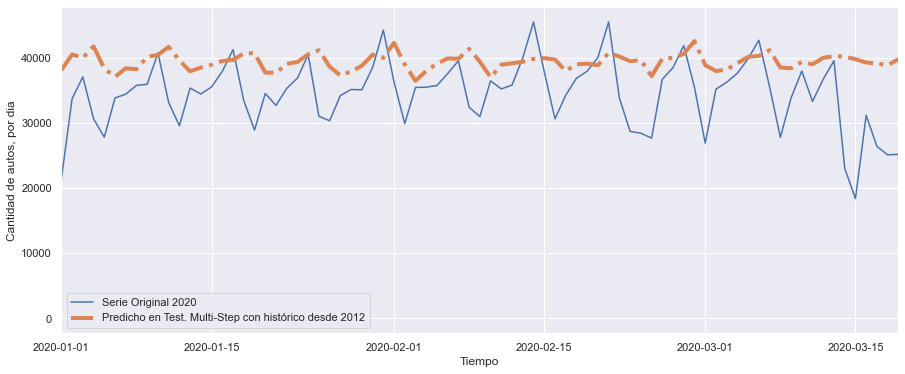

In [1059]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,label = 'Serie Original 2020')
plt.plot(diario_2020.index,y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step con histórico desde 2012')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.xlim('2020-01-01','2020-03-19')
plt.legend()
plt.show()

Los resultados del Multi Step prediction para predecir la serie en el año 2020, hasta el 19/03/2020 inclusive, luego de incorporar más periodos hacia atrás en la serie,arrojan:

* Test score 7.096,51 (Histórico desde 2012) vs 7.479,72 (Histórico desde 2017) (Mejora del 5,12%)

    **Siguiendo la misma tendencia que con el one step prediction, la performance evidencia una pequeña mejora.**

### Para pensar, investigar y, opcionalmente, implementar<a name="id3"></a>
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

***Subíndice***   

1. [¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?](#id31)
2. [¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?](#id32)
3. [¿Hay algo que te gustaría investigar o probar?](#id33)

##### 1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?<a name="id31"></a>

Podría incorporar estas variables de distintas formas:
 
 * Una manera sería hacer un modelo específico para cada uno de los valores que puede asumir. Ejemplo: entrenar y predecir los valores de la serie de tiempo excusivamente para los días lunes de la semana.
 
 * Otra forma sería incorporar al dataset con el look back de valores de la serie, los valores que asumió en ese mismo periodo de tiempo otra variable que puede afectar a la variables que estamos estudiando. Ejemplo: en el modelo One Step Prediction Univariante, contamos con los valores que asumió la serie "Cantidad de Pasos diaria de vehículos en estación Illia, Forma de pago Efectivo" en los últimos 90 días para predecir el día siguiente. Podría agregar a este dataset, los valores que asumió en ese mismo periodo de tiempo, la serie "Cantidad de Pasos diaria de vehículos en estación Illia, Forma de pago Telepase" de forma que el modelo capte la relación que existe entre ambas.
 
 * Por último se me ocurre, que podría agregar estas variables como variables dummy en el modelo.Una Serie de Tiempo Multivariante es una serie de tiempo con más de una variable que depende del tiempo. Cada variable depende de sus valores pasados, pero a la vez también tiene cierto grado de dependencia con otras variables y esta dependencia es tenida en cuenta al predecir los valores. Dichas variables pueden ser endógenas o exógenas. Una variable exógena es aquella cuyo valor es determinado fuera del modelo e impuesta en el modelo. Dicho de otra forma, son variables que afectan el modelo sin ser afectadas por él. (https://medium.com/datos-y-ciencia/predicci%C3%B3n-con-series-de-tiempo-una-gu%C3%ADa-inicial-2bd62d55675a) Por ejemplo, agregar una variable que sea "EsViernes" con valores 0 ó 1.
 


 
 

Pienso que las predicciones mejorarían, ya que cada variable depende de sus valores pasados, pero a la vez también tiene cierto grado de dependencia con otras variables. Si logramos identificar aquellas variables que afectan al comportamiento de la serie, estaríamos agregandole valor al modelo,ya que este podrá aprender las relaciones que existen entre estas variables y serán un gran input para una mejor predicción.

#### 2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?<a name="id32"></a>

In [1060]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_estaciones = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la forma de pago Efectivo
#dataset_estaciones = dataset_estaciones[dataset_estaciones.forma_pago == 'EFECTIVO']

#Quitamos las columnas que no vamos a utilizar
dataset_estaciones.drop(columns = ['periodo','hora_inicio','forma_pago'], inplace = True)

dataset_estaciones.head()

fecha  hora_fin     dia    estacion    sentido tipo_vehiculo  \
0  2019-01-01         1  Martes     Alberti     Centro       Liviano   
1  2019-01-01         1  Martes     Alberti     Centro       Liviano   
2  2019-01-01         1  Martes     Alberti  Provincia       Liviano   
3  2019-01-01         1  Martes     Alberti  Provincia       Liviano   
4  2019-01-01         1  Martes  Avellaneda     Centro       Liviano   

   cantidad_pasos  
0              22  
1               6  
2              53  
3              18  
4              16

In [1061]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_estaciones['fecha2'] = pd.to_datetime(dataset_estaciones.fecha) + pd.to_timedelta(dataset_estaciones.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_estaciones.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_estaciones.head()

dia    estacion    sentido tipo_vehiculo  cantidad_pasos  \
0  Martes     Alberti     Centro       Liviano              22   
1  Martes     Alberti     Centro       Liviano               6   
2  Martes     Alberti  Provincia       Liviano              53   
3  Martes     Alberti  Provincia       Liviano              18   
4  Martes  Avellaneda     Centro       Liviano              16   

               fecha2  
0 2019-01-01 01:00:00  
1 2019-01-01 01:00:00  
2 2019-01-01 01:00:00  
3 2019-01-01 01:00:00  
4 2019-01-01 01:00:00

In [1062]:
#Corregimos el nombre de fecha2 a fecha
dataset_estaciones.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset_estaciones.sort_values('fecha', inplace = True)
dataset_estaciones.reset_index(drop=True, inplace = True)
dataset_estaciones

dia            estacion    sentido tipo_vehiculo  cantidad_pasos  \
0        Domingo   Dellepiane Centro     Centro       Liviano               6   
1        Domingo               Illia  Provincia       Liviano               9   
2        Domingo               Illia  Provincia       Liviano               3   
3        Domingo  Dellepiane Liniers  Provincia       Liviano               3   
4        Domingo          Avellaneda     Centro       Liviano              36   
...          ...                 ...        ...           ...             ...   
3560701   Martes          Dellepiane  Provincia        Pesado              13   
3560702   Martes          Dellepiane  Provincia        Pesado               1   
3560703   Martes          Dellepiane  Provincia        Pesado               2   
3560704   Martes          Dellepiane  Provincia       Liviano             150   
3560705   Martes          Avellaneda     Centro       Liviano               3   

                      fecha  
0       2017-01-01 00:00:00  
1       2017-01-01 00:00:00  
2       2017-01-01 00:00:00  
3       2017-01-01 00:00:00  
4       2017-01-01 00:00:00  
...                     ...  
3560701 2019-12-31 23:00:00  
3560702 2019-12-31 23:00:00  
3560703 2019-12-31 23:00:00  
3560704 2019-12-31 23:00:00  
3560705 2019-12-31 23:00:00  

[3560706 rows x 6 columns]

In [1063]:
estaciones = dataset_estaciones.estacion.unique()
estaciones

array(['Dellepiane Centro', 'Illia', 'Dellepiane Liniers', 'Avellaneda',
       'Retiro', 'Salguero', 'Alberdi', 'Sarmiento', 'Dellepiane',
       'Alberti', 'PDB'], dtype=object)

Voy a definir funciones para realizar 

* detección y eliminación de outliers
* imputar valores nulos con la función interpolate

* Función para detectar Outliers según Rango Intercuartílico:

In [1064]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

* Función para eliminar Outliers según Rango Intercuartílico:

In [1065]:
def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_in.loc[(df_in[col_name] < minimum)] = np.nan
    df_in.loc[(df_in[col_name] > maximum)] = np.nan
    return df_in

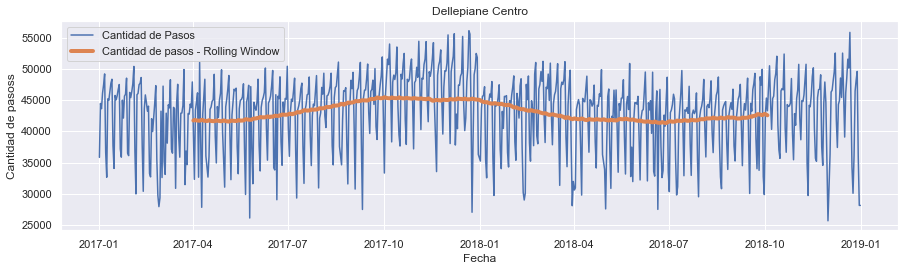

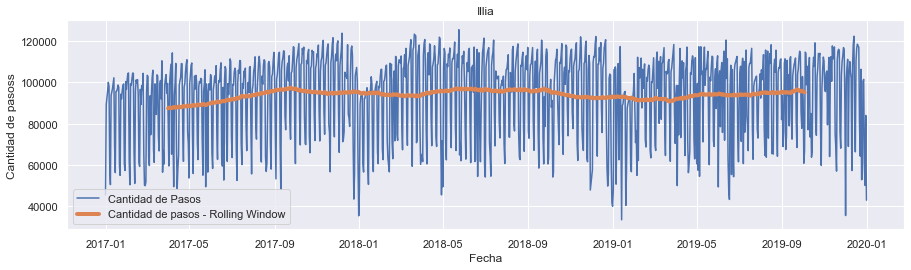

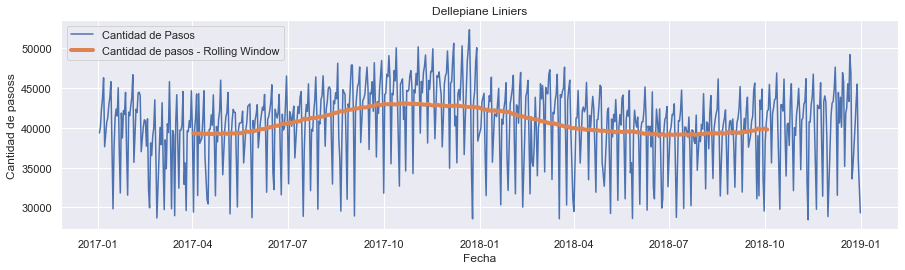

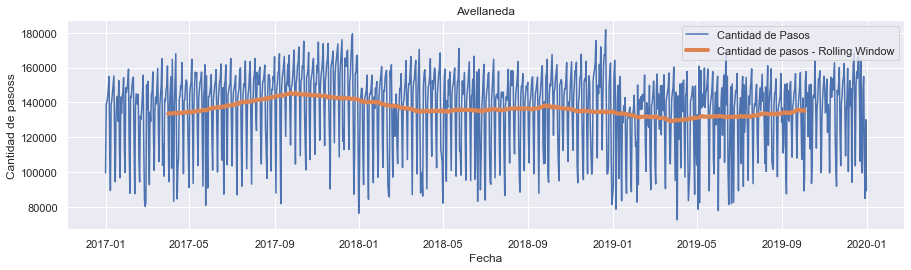

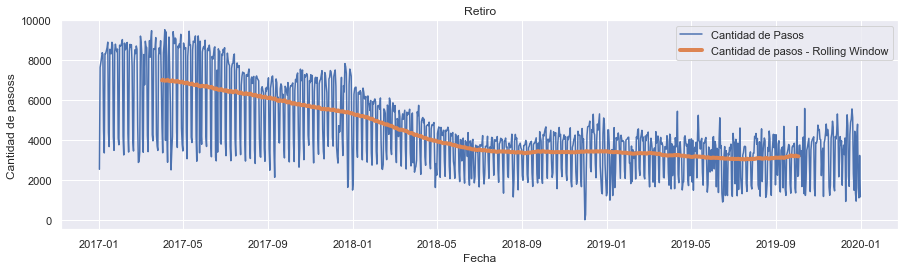

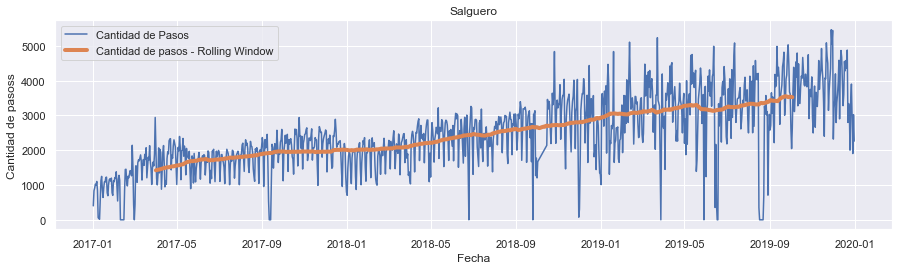

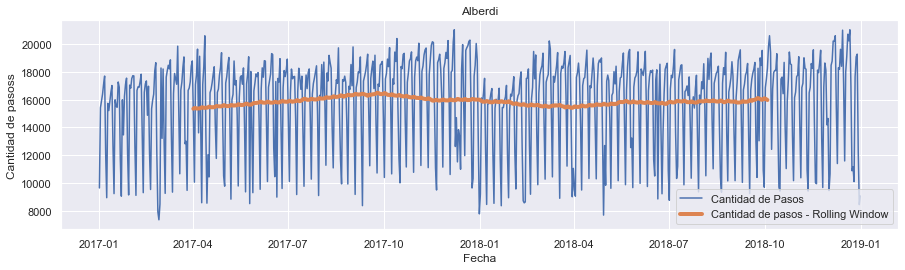

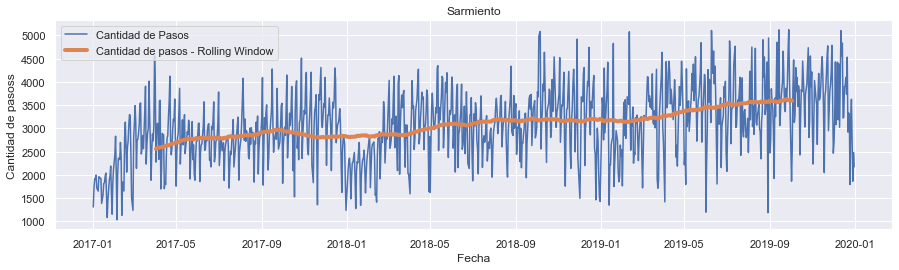

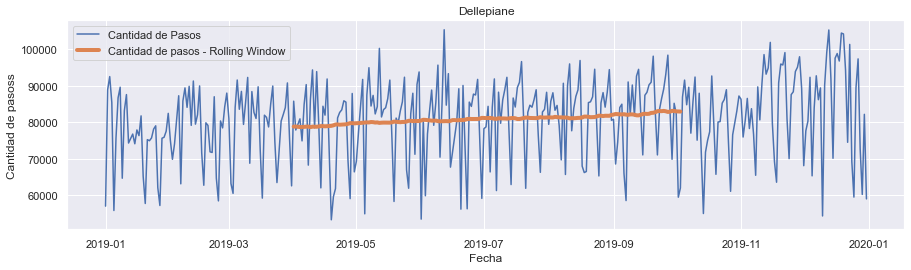

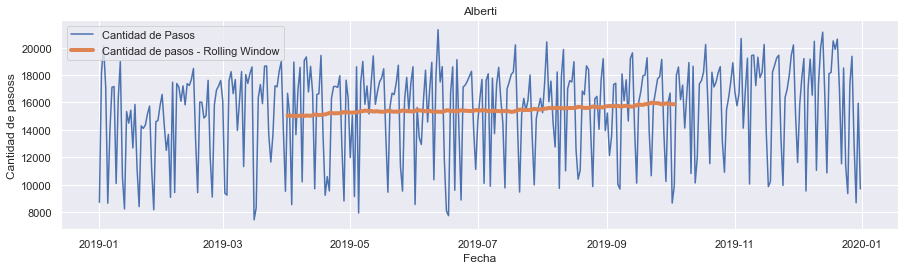

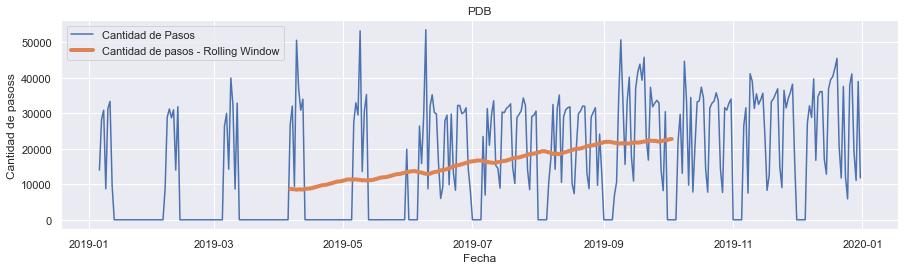

In [1066]:
ventana=180
j=1
for i in estaciones:
    mask=dataset_estaciones.estacion==i
    estacion=dataset_estaciones[mask]
    estacion = estacion.resample('D', on = 'fecha').sum()
    estacion= remove_outliers(estacion,'cantidad_pasos')
    estacion = estacion.interpolate(method='time')
    tend = estacion.cantidad_pasos.rolling(window=ventana, center = True).mean()
    plt.figure(figsize = (15,50))
    plt.subplot(len(estaciones),1,j)
    plt.title(i)
    plt.plot(estacion.index, estacion.cantidad_pasos, label = 'Cantidad de Pasos')
    plt.plot(tend, lw = 4, label = 'Cantidad de pasos - Rolling Window')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de pasoss')
    plt.legend()
j=j+1

Teniendo en cuenta la información de 2017-2018-2019 para todas las formas de pago encuentro lo siguiente, según el siguiente comportamiento según cada estación:
    
* Estación Retiro: tendencia marcademente decreciente

* Estación Salguero : tendencia marcademente creciente

* Resto de las estaciones: comportamiento estable en la cantidad de pasos.

Investigando, pude encontrar información auxiliar que confirma lo observado en el gráfico anterior.



Ingresos con sistema Free Flow

**El nuevo ingreso desde Salguero a Au.Illia sentido General Paz cuenta con dos carriles para vehículos livianos. Tiene la particularidad de ser exclusivo para clientes del peaje automático (AUPASS / Pase / Telepeaje / SIGA)**.

Esto se debe a que, si bien cuenta con peaje, no hay cabinas para el pago ni barreras, sino que se instaló una modalidad tipo Free Flow, mediante la cual los vehículos no se detienen. El pago se realiza automáticamente a través del sistema.

De esta manera, la Au.Illia se consolida como pionera en Argentina en incluir este sistema. La primera vez que se implementó fue en la misma autopista para el ingreso de Sarmiento sentido General Paz, habilitado en julio 2014. Su objetivo fue descomprimir el acceso a Cantilo ubicado en Av. Figueroa Alcorta, pasando La Pampa, posibilitando así un ahorro de tiempo de aproximadamente 10 minutos.

fuente: https://www.buenosaires.gob.ar/noticias/los-nuevos-accesos-de-la-autopista-illia

#### 3. ¿Hay algo que te gustaría investigar o probar?<a name="id33"></a>

Me gustaría aplicar lo estudiado en el siguiente link de referncia: https://www.apsl.net/blog/2017/06/14/analisis-de-series-temporales-usando-redes-neuronales-recurrentes/

Conclusiones y notas finales

* **Me resultó interesante ya que en este artículo se describe como el grupo de Ciencias de Datos de APSL introduce el uso de redes neuronales recurrentes de tipo Long Short-Term Memory Network (LSTM) como herramienta para tratar problemas relacionados con el análisis y predicción de series temporales.** 
En contraste con las técnicas tradicionales usadas para este fin, como los son los modelos de predicción auto-regresivos, entre otros. 

* **Además este enfoque no sólo incorpora como parámetro de análisis los datos de la evolución de su propia historia, sino que incluye también como parámetro de entrada para el análisis de la serie, el efecto de agentes o variables externas que tienen influencia en el comportamiento de la serie en estudio.** Estas variables externas y sus efectos muchas veces no son consideradas en métodos tradicionales debido a la dificultad para incorporarlas al análisis.

* Como casos de estudio y para demostrar el grado de éxito del método, se aplicó este enfoque al estudio del consumo eléctrico en la población de Sóller, (Mallorca), y el estudio del consumo eléctrico en la isla de Tenerife. **El objetivo es mostrar cómo, con esta metodología se puede predecir el consumo eléctrico de las poblaciones con un grado de precisión que ronda el 93%. Para ambos casos, para el entrenamiento de la LSTM hemos introducido como parámetros de entrada la serie histórica de consumo eléctrico para un periodo de tiempo determinado y la serie histórica del valor de la temperatura como variable externa para el mismo periodo de tiempo.**

* Con respecto a la predicción, **se concluye que el modelo de redes neuronales de tipo LSTMs genera una estimación de valores con una buena aproximación a los datos reales**. Sin embargo cabe destacar que validez de la predicción está asociada, por un lado a la calidad de los datos así como el número de registros de la misma, y por otro, a la posibilidad de poder establecer con un alto grado precisión los efectos de las variables externas que se tomen en consideración.

* La metodología propuesta en éste artículo ha sido aplicado al análisis de series temporales relacionada al consumo eléctrico, sin embargo éste método es aplicable al análisis de cualquier tipo de series temporales.